# Does the Post-Soviet Space Still Exist?
## An Unsupervised Machine Learning Approach to Classifying Countries according to Specific Economic and Political Characteristics

1. Intro: Problem Definition
2. Methodology Description
3. Data: 
    1. Data Collection;
    2. Data Preparation.
4. Checking Hypotheses:
    1. H1 - The Post-Soviet Space Still Exists:
        1. Using dataset 1 (DS1) without any dimensionality reductions;
        2. Using dataset 2 (DS2) with only feature techniques of a dimensionality reduction.
    2. H2 - The Post-Soviet Space is Homogeneous
5. Visualization

## 1. Intro: Problem Definition

The upcoming 30th anniversary of the 1991 Belavezha Accords is again attracting the attention of researchers and policymakers to the topic of the post-Soviet transformation. The question about the consistency of this region’s characteristics compared to other countries and regions or their conceptual differences, based on the theory of institutional change and persistence, is still not fully answered. Benefiting from available open-source data and machine learning (ML) algorithms, I propose to take a new look at this question.

## 2. Methodology Description

The application of ML algorithms (particularly the unsupervised ML approach) remains scarce in social sciences, even though it has become technically available and can produce unique and accurate information for further in-depth analysis. With publicly available country-level data, I aim to build an ML algorithm to cluster countries in groups with shared characteristics in different fields – from society to economics to domestic and international politics. By doing so, I will identify hidden and previously unseen structures in the existing data.

If the ML algorithm classifies all or most of the post-Soviet states into a separate group(s), we will have solid empirical grounds to continue applying the concept of the post-Soviet states in social science research and in applied analysis. If, however, the findings are different, we will get a factual confirmation of the increasingly popular argument about the end of the post-Soviet transit. In other words, **the hypothesis 1 (H1) is that the Post-Soviet Space Still Exists.**

Also, I am going to test another **hypothesis (H2) that the Post-Soviet space is homogeneous.** If the Silhouette coefficients do not allow to choose different clusters when we apply the ML algorithm to only 15 post-Soviet states, I will accept the H1. If instead there are be different clusters among 15 post-Soviet states, defined by the K-Mean+ algorithm, the H1 will be rejected.

In any way, the findings will register a data-driven opening of new avenues for research in area studies (post-Soviet studies), transition studies, and IR/geopolitical studies. Yet, it is noteworthy that the algorithmic cluster analysis is not about answering research questions, but about finding new relationships and insights, often not visible through other methods of data investigation.



## 3. Data

### A. Data Collection

**How do I choose attributes for analysis?**

Before the start of the research, I have to define the number of variables that can be used as predictors for a country to be a part of the post-Soviet area. In this matter, a preliminary discussion session of an expert elicitation was organized in Minsk (Belarus) to discuss what socio-economic, political, demographic, political, and geopolitical factors could define the post-Soviet region. Additionally, a simple survey form with the same question was sent to 32 experts in various fields from different countries. With a survey response rate at 28%, which is typical for social science, and extra results of 3 deep interviews after the preliminary discussion session, I made a list of potential attributes of countries for further analysis. The total number of countries' characteristics, at this stage of research, is 52.

**How do I collect the data?**

For the purpose of the research, I use the data from different sources to build a valid dataset. For economic and demographic indicators, I use the databases of IMF and the World Bank; for political indicators - V-Dem Database; for military indicators - the SIPRI Arms Transfers Database. 

The full data set with additional notes about each indicator can be downloaded separately from my GitHub page repository.

The data has been collected for the last available year (in most cases, 2020). In the case of the absence of the data, I took a value for previous years. 

### B. Data Preparation

**How do I handle the problem with missing variables**

To handle the problem of missing variables I use the method of imposing missing values with Median value for a particular attribute.

In [1]:
#Install additional packages

! pip install bubbly
! pip install iplot
! pip install chart_studio
! pip install missingno

You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# Import libraries and moduls
    
# numpy
import numpy as np
# matplotlib modul
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# pandas
import pandas as pd
#seaborn
import seaborn as sns
#plotly
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
# scikit-learn
import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
# missing values 
import missingno as msno

In [3]:
#Change working directory
%cd '/Users/antonboltochko/Documents/Projects/MD/2021/ML_Class_BelovezhaAccords_Sep2021/Pre GitHub Project Folder/data/interim' 

data = pd.read_csv("All indicators_cleaned_AO.csv")
data

/Users/antonboltochko/Documents/Projects/MD/2021/ML_Class_BelovezhaAccords_Sep2021/Pre GitHub Project Folder/data/interim


country_id   country_name  post_ussr  industry   service      agro  \
0             1    Afghanistan          0  0.124709  0.560685  0.270136   
1             2        Albania          0  0.197050  0.484283  0.192521   
2             3        Algeria          0  0.342486  0.477798  0.142277   
3             6         Angola          0  0.447609  0.413944  0.094298   
4             8      Argentina          0  0.224695  0.543372  0.068361   
..          ...            ...        ...       ...       ...       ...   
134         203     Uzbekistan          1  0.327845  0.334992  0.260686   
135         205  Venezuela, RB          0  0.372447  0.516675  0.050268   
136         206        Vietnam          0  0.337241  0.416253  0.148532   
137         209         Zambia          0  0.427359  0.483204  0.027324   
138         210       Zimbabwe          0  0.126124  0.374405  0.050740   

      hh_cons   gov_exp    invest  net_export  ...  death_rate  birth_rate  \
0    0.810000  0.280000  0.120000   -3.000000  ...       6.285      31.802   
1    0.802054  0.115183  0.241010   -0.148310  ...       8.082      11.620   
2    0.435004  0.169461  0.448293   -0.110499  ...       4.716      23.583   
3    0.558112  0.100041  0.227623    0.079529  ...       7.981      40.232   
4    0.646142  0.157710  0.137766    0.027272  ...       7.604      16.833   
..        ...       ...       ...         ...  ...         ...         ...   
134  0.541545  0.169007  0.374631   -0.104230  ...       4.600      24.300   
135  0.752896  0.146034  0.248102   -0.147032  ...       7.118      17.566   
136  0.681621  0.064606  0.266618    0.029228  ...       6.380      16.454   
137  0.422491  0.176842  0.392619    0.004813  ...       6.321      35.776   
138  0.470687  0.156525  0.057110   -0.073343  ...       7.773      29.747   

     fertility  education  atheist  rus_lang  main_relig  arm_exp  arm_imp  \
0        4.321   0.041000    0.009         0         6.0        0     1384   
1        1.597   0.289235    0.009         0         6.0        0       11   
2        2.988   0.473000    0.018         0         6.0        0     6027   
3        5.442   0.289000    0.052         0         2.0        0      745   
4        2.247   0.459000    0.121         0         2.0        0      139   
..         ...        ...      ...       ...         ...      ...      ...   
134      2.785   0.999172    0.009         0         6.0       68      286   
135      2.250   0.744302    0.097         0         2.0        0      188   
136      2.050   0.653398    0.299         0         3.0        0     2496   
137      4.559   0.217000    0.009         0         2.0        0      126   
138      3.531   0.649352    0.076         0         2.0        0        0   

     mil_expend  
0      0.044897  
1      0.046681  
2      0.169896  
3      0.077938  
4      0.017114  
..          ...  
134    0.035500  
135    0.000000  
136    0.000000  
137    0.047805  
138    0.000000  

[139 rows x 55 columns]

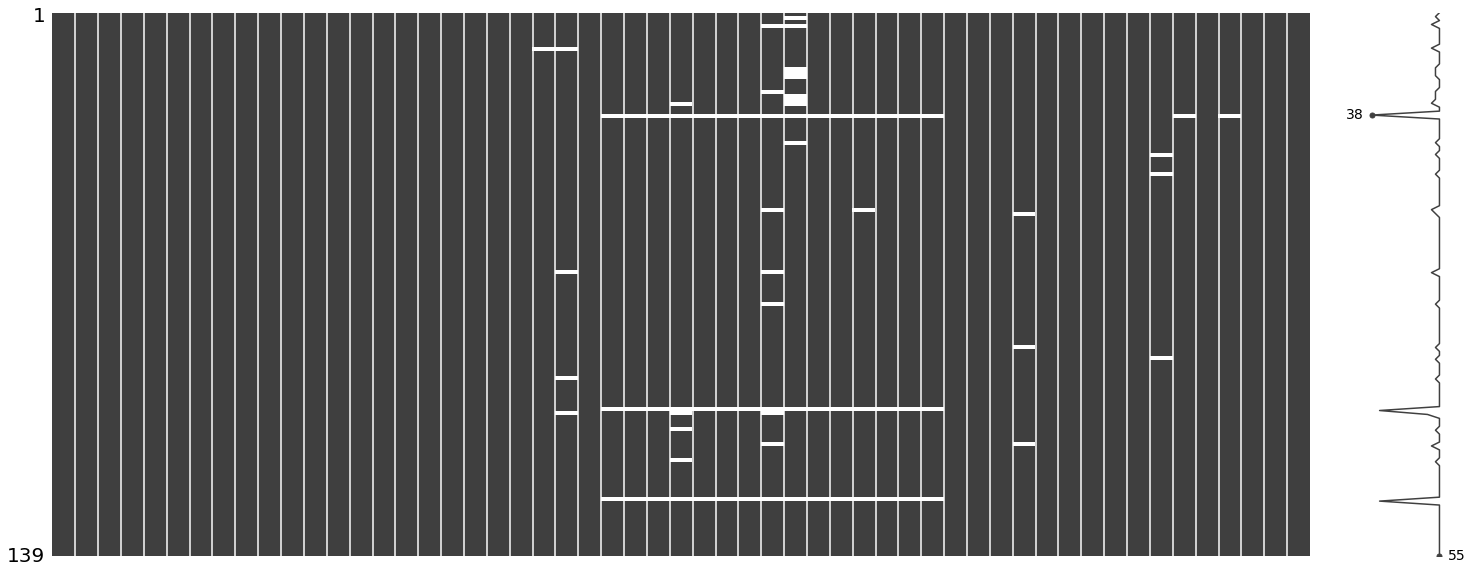

In [4]:
#Checking how many missing variables I have
msno.matrix(data)

As can be seen, I have some missing values in the dataset. First, I check if these data points are for Post-Soviet countries because they are crucial for the analysis.

In [5]:
#Check if I have any datapoints missing for post-Soviet states
null_data = data[data.isnull().any(axis=1)]
null_data

country_id              country_name  post_ussr  industry   service  \
1             2                   Albania          0  0.197050  0.484283   
3             6                    Angola          0  0.447609  0.413944   
9            15                   Bahrain          0  0.405220  0.591680   
14           25    Bosnia and Herzegovina          0  0.238713  0.557306   
15           27                    Brazil          0  0.176501  0.629224   
16           30                  Bulgaria          0  0.229700  0.601632   
20           38  Central African Republic          0  0.208387  0.425086   
21           39                      Chad          0  0.169413  0.468700   
22           41                     Chile          0  0.314259  0.564789   
23           42                     China          0  0.378209  0.545260   
26           48             Cote d'Ivoire          0  0.211873  0.431119   
33           58                   Ecuador          0  0.320045  0.526345   
36           61         Equatorial Guinea          0  0.452115  0.517072   
41           70                     Gabon          0  0.414691  0.462176   
50           85      Hong Kong SAR, China          0  0.062557  0.899808   
51           86                   Hungary          0  0.252468  0.558313   
66          104                    Kuwait          0  0.583802  0.547229   
74          118                  Malaysia          0  0.359073  0.547848   
85          136                     Nepal          0  0.117974  0.533109   
88          139                 Nicaragua          0  0.250609  0.493473   
93          145                      Oman          0  0.537241  0.481370   
101         155               Puerto Rico          0  0.511313  0.488416   
102         156                     Qatar          0  0.512012  0.538305   
106         163              Saudi Arabia          0  0.413646  0.562353   
110         168                 Singapore          0  0.243650  0.709479   
114         175               South Sudan          0  0.330945  0.565505   
124         191                     Tonga          0  0.153791  0.504896   

         agro   hh_cons   gov_exp    invest  net_export  ...  death_rate  \
1    0.192521  0.802054  0.115183  0.241010   -0.148310  ...       8.082   
3    0.094298  0.558112  0.100041  0.227623    0.079529  ...       7.981   
9    0.003146  0.398345  0.157628  0.330770    0.113235  ...       2.408   
14   0.062046  0.749991  0.194419  0.200200   -0.146220  ...      10.877   
15   0.059056  0.647644  0.200778  0.154049    0.013874  ...       6.531   
16   0.034133  0.588920  0.167902  0.189607    0.016992  ...      15.500   
20   0.339178  0.960900  0.080446  0.231560   -0.181300  ...      11.974   
21   0.477293  0.760851  0.035875  0.224471   -0.171732  ...      11.907   
22   0.038626  0.632081  0.146295  0.198233    0.052479  ...       6.254   
23   0.076531  0.392481  0.167705  0.432511    0.024869  ...       7.100   
26   0.206712  0.686765  0.101132  0.200586    0.011516  ...       9.869   
33   0.098033  0.596593  0.144147  0.231175    0.017791  ...       5.121   
36   0.029948  0.561479  0.250333  0.053104   -0.031252  ...       9.112   
41   0.064040  0.376822  0.109934  0.216137    0.252700  ...       6.704   
50   0.000723  0.693759  0.108782  0.189512    0.018221  ...       6.500   
51   0.034504  0.493546  0.197992  0.276180    0.021559  ...      13.300   
66   0.003846  0.413560  0.252218  0.250183    0.084039  ...       2.802   
74   0.082061  0.598216  0.116948  0.196780    0.064408  ...       5.170   
85   0.231268  0.765795  0.081171  0.284000   -0.271269  ...       6.322   
88   0.157733  0.711777  0.156484  0.191774   -0.048290  ...       5.075   
93   0.023529  0.406634  0.245701  0.201765    0.145900  ...       2.422   
101  0.006180  0.638199  0.080142  0.115110    0.139820  ...       9.400   
102  0.002867  0.245252  0.185196  0.425803    0.143748  ...       1.244   
106  0.025626  0.389363  0.238487  0.263930    0.020

The visual analysis of the data gives me an understanding that there are no missing data points for post-Soviet countries. Hence, I can safely use one of the methods of imputing missing values. 

In [6]:
#Check what columns contain missing values
data.isna().sum()

country_id           0
country_name         0
post_ussr            0
industry             0
service              0
agro                 0
hh_cons              0
gov_exp              0
invest               0
net_export           0
empl_ind             0
empl_serv            0
empl_agro            0
gdp_growth_ave       0
infl_ave             0
unempl_ave           0
empl_ave             0
fisc_bal_ave         0
gov_debt_ave         0
cur_bal_ave          0
gdp_perc_ppp         0
gini                 1
povert               4
electro              0
elecdem              3
parpipdem            3
delibdem             3
frefair              7
jucon                3
legcon               3
cspart               3
locelec             10
eltrnout            12
clrelig              3
clstown              3
svstterr             4
mediacens            3
womempow             3
freeexp              3
male                 0
nat_pop_increase     0
migration            0
rural                3
life_expect

In [7]:
#Check what format missing values have
data['eltrnout']

0      0.1900
1         NaN
2      0.3988
3         NaN
4      0.7900
        ...  
134    0.6780
135    0.4574
136    0.0000
137    0.0000
138    0.8516
Name: eltrnout, Length: 139, dtype: float64

In [8]:
#Create a list of columns names
columns_miss = list(data.columns.values)

#Impute missing values with Median
data[columns_miss] = data[columns_miss].replace(np.NaN, data[columns_miss].median())

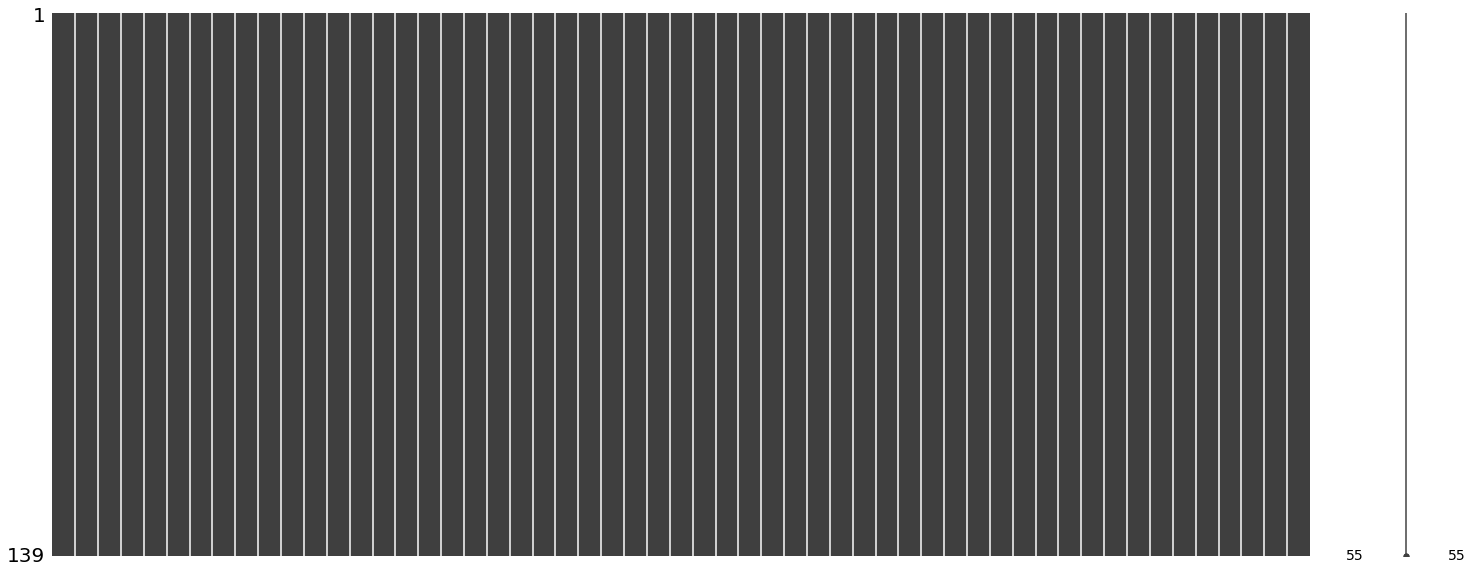

In [9]:
#Check matrix
msno.matrix(data)

In [10]:
#Local check
data['eltrnout']

0      0.1900
1      0.6000
2      0.3988
3      0.6000
4      0.7900
        ...  
134    0.6780
135    0.4574
136    0.0000
137    0.0000
138    0.8516
Name: eltrnout, Length: 139, dtype: float64

In [11]:
len(data.columns)

55

The matrix plot shows that the problem with missing variables has been solved. 

## 4. Checking Hypotheses

**What attributes do I choose to feed the machine learning algorithm?**

At this point, the total number of instances/countries (rows) and attributes/countries' characteristics (columns) are 139 and 52 respectively.

Now, the most important step is to identify whether all attributes from the dataset are required to find the answer to the raised research question. The main reason why I have a strong concern about the number of attributes is that the clustering process often suffers from both the limitations of the algorithms and the Curse of Dimensionality. 

*Curse of Dimensionality*

The dimension of a dataset corresponds to the number of attributes in this dataset. Generally, a dataset with more than a hundred attributes can be considered high-dimensional data. Even though our data set has less than a hundred countries' characteristics, 52 attributes could lead to the same set of problems that arise when working with high-dimensional data.

There are two main issues when clustering in high dimensions. The most obvious one is the problem of visualization - it is hard to plot high-dimensional data for visual analysis or interpretation (we will back to this later on). Another problem related to 'distance concentration': with the increase of the dimensionality of data, all the pairwise distances between different points in the space converge to the same value. Since the machine learning model I am going to use (K-Mean+) is based on distance metrics to identify similarities between countries' characteristics, the Curse of Dimensionality cannot be ignored. In fact, under the 'surprising' behavior of distance metrics in high dimensional space, the idea of similarities built on the measurement of Euclidean distances may lead to biased results. (More about 'distance concentration' is here <span> https://stats.stackexchange.com/questions/451027/mathematical-demonstration-of-the-distance-concentration-in-high-dimensions</span>.)

I address this problem by implementing some techniques for dimensionality reduction (DR). As a result, I conduct an analysis using two different datasets: (a) without any reductions of dimensionality (DS1), (b) with only feature techniques of DR (DS2).

Of course, at the stage of data analysis, instead of the model with the usage of a Euclidian distance, I could choose the model with a Manhattan distance (in higher dimensions we can expect most Euclidean distances between observations in a dataset to be very nearly the same). But for now, I am going to leave it simple and stick to the basic specification with a Euclidian distance.

**How do I prepare DS1 (without any reductions of dimensionalities)**

To reduce potential biases of results, we do the following manipulations with data:

1. Check histogram of each attribution from the dataset in order to identify the need for standardization and normalization of the data;
2. Transform the data if there are heavily skewed cases. The data that skewed either to the left or to the right, in a statistical distribution, may lead to very elongated clusters. Considering that the K-Means+ algorithm favors roughly spherical-shaped clusters, such asymmetric data will distort the results of clustering. Yet, taking the log of an attribution variable should reduce the skewness and typically makes the distribution closer to normal. It should be highlighted that if one decided to use another, alternative algorithm for clustering tasks that are less sensitive to outliers, then such transformation would not be needed. 
3. Standardize the data. We believe that this might be a good idea to mix standardization and normalization. Standardization shifts the distribution -- after the process of standardization attributions will have a mean of zero and a standard deviation of one. The method of standardization we are going to use is a powerful transformation. Sklearn offers a PowerTransformer scaler that applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. It includes the Yeo-Johnson and Box-Cox transform. Since we have negative values, the Yeo-Johnson transform is preferred. More information about the method can be found her <span>https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py</span>.)

/Users/antonboltochko/Documents/Projects/MD/2021/ML_Class_BelovezhaAccords_Sep2021/Pre GitHub Project Folder/data/interim


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



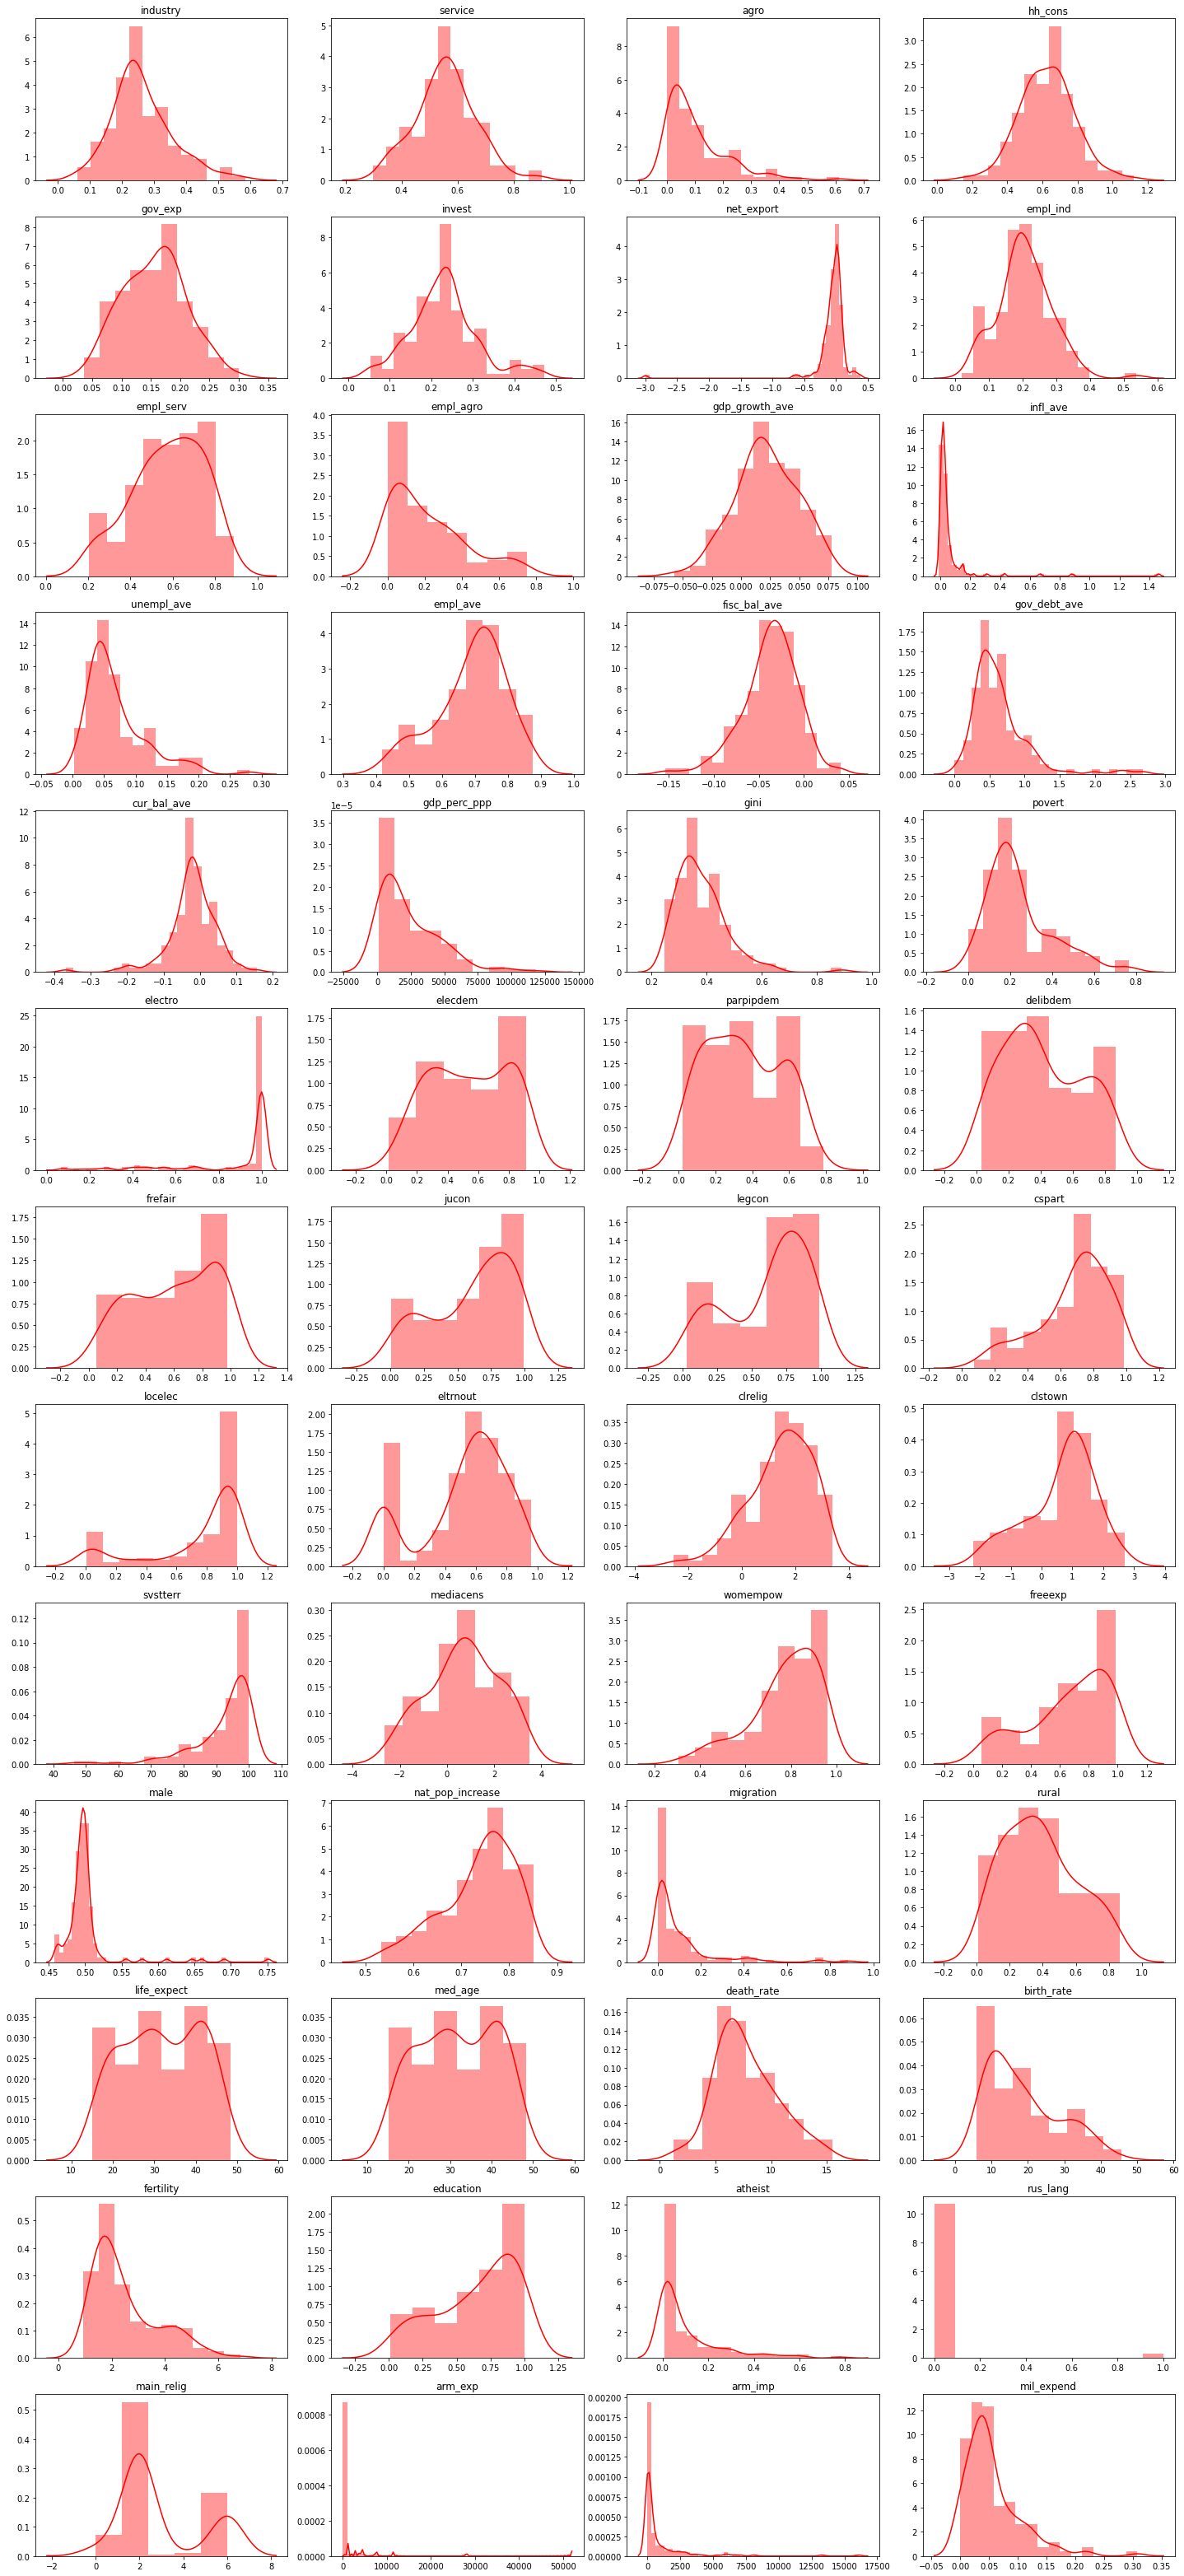

In [13]:
#Change working directory
%cd '/Users/antonboltochko/Documents/Projects/MD/2021/ML_Class_BelovezhaAccords_Sep2021/Pre GitHub Project Folder/data/interim' 

#Load dataset
econ_df = data

#HISTOGRAM CHECK

#Create a list of columns' names
columns = list(econ_df.columns.values)

#Remove from the list attributes that are not needed for the destribution analysis
elimin = ['country_id','country_name', 'post_ussr']
columns_attr = [ elem for elem in columns if elem not in elimin]

#Drop 'country_id','country_name', 'post_ussr' for scaling, and create a new dataframe with this columns.
econ_df_attr = econ_df.drop(['country_id','country_name', 'post_ussr'], axis=1)

#Create a density plot for each attribute for visual inspection
plt.figure(figsize = (20, 50))
for k in range(len(columns_attr)):
  plt.subplot(15, 4, k+1)
  sns.distplot(econ_df_attr[[columns_attr[k]]], color = 'r');
  plt.title(columns_attr[k])
plt.tight_layout()

From the visual inspection of the graphs, we can conclude that in order to improve the performance of our algorithm, it is better to transform each variable to make the distribution Gaussian (if not Gaussian, then more Gaussian-like).

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



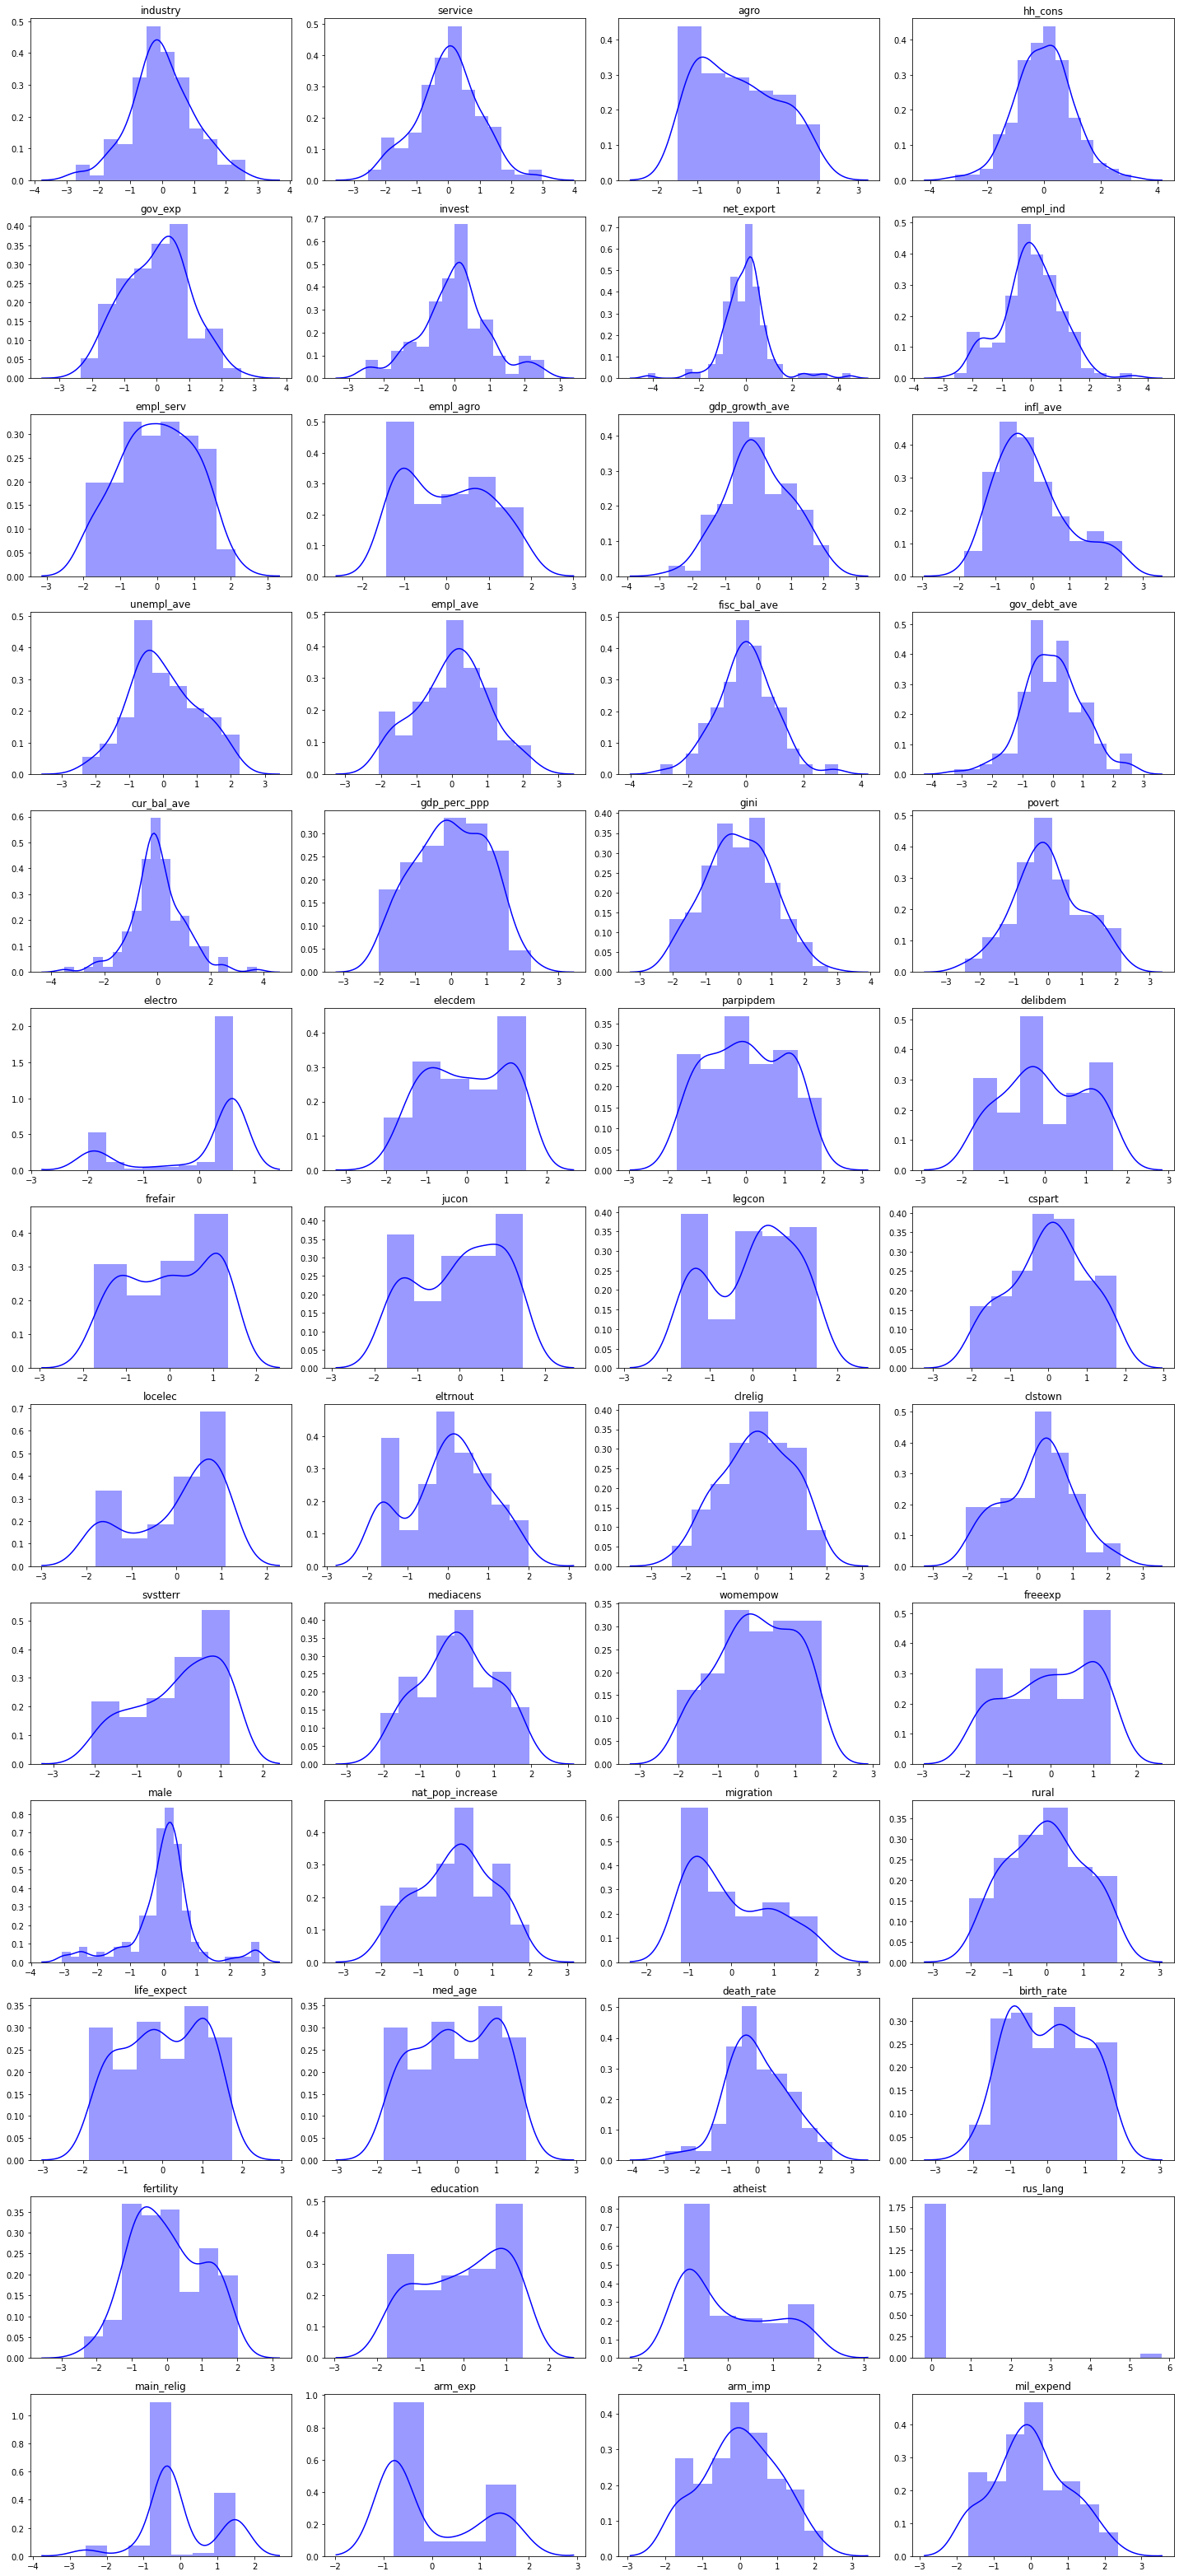

In [14]:
#SCALING THROUGH POWER TRANSFORMATION

#Scale the data with powertransformation 
ptransform = PowerTransformer(method='yeo-johnson')
econ_df_attr_sc = ptransform.fit_transform(econ_df_attr)

#Back to DataFrame with attribution titles
econ_df_attr_sc = pd.DataFrame(data = econ_df_attr_sc, columns = [columns_attr]) 

#Create a density plot for each attribute for visual inspection after scaling
plt.figure(figsize = (20, 50))
for k in range(len(columns_attr)):
  plt.subplot(15, 4, k+1)
  sns.distplot(econ_df_attr_sc[[columns_attr[k]]], color = 'b');
  plt.title(columns_attr[k])
plt.tight_layout()


We can see that 
the shape of the histograms for the most attributes looks more Gaussian than the raw data. Hence, we have DS1 ready to be fed to the algorithm.

In [15]:
econ_df_attr_sc.describe()

industry       service          agro       hh_cons       gov_exp  \
count  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   
mean  -1.533545e-16  5.511179e-16  3.103033e-16 -4.792330e-17 -4.075976e-16   
std    1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   
min   -2.720550e+00 -2.547217e+00 -1.493057e+00 -3.127729e+00 -2.352250e+00   
25%   -5.626315e-01 -5.964472e-01 -9.092871e-01 -6.526965e-01 -7.713529e-01   
50%   -4.656995e-02  3.148139e-02 -1.138505e-01  8.340635e-02  7.928204e-02   
75%    6.406352e-01  5.560987e-01  7.771343e-01  5.656437e-01  6.651501e-01   
max    2.619437e+00  2.962402e+00  2.054948e+00  3.078318e+00  2.600220e+00   

             invest    net_export      empl_ind     empl_serv     empl_agro  \
count  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   
mean  -9.904148e-17  8.386577e-18  1.677315e-16  1.437699e-16 -5.111818e-17   
std    1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   
min   -2.523413e+00 -4.208838e+00 -2.632958e+00 -1.938979e+00 -1.425058e+00   
25%   -4.852808e-01 -4.476726e-01 -5.278476e-01 -6.923332e-01 -9.979292e-01   
50%    7.962690e-02  6.899335e-02 -1.242071e-02  1.286367e-02 -4.783109e-02   
75%    4.642697e-01  4.127920e-01  6.249825e-01  8.037712e-01  8.205199e-01   
max    2.548934e+00  4.500713e+00  3.473370e+00  2.126262e+00  1.815840e+00   

       ...    death_rate    birth_rate     fertility     education  \
count  ...  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   
mean   ... -6.494605e-16 -6.869006e-17  7.380188e-16  2.875398e-17   
std    ...  1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   
min    ... -2.938378e+00 -2.103986e+00 -2.363292e+00 -1.767950e+00   
25%    ... -6.513201e-01 -9.166066e-01 -7.557611e-01 -8.310576e-01   
50%    ... -1.414902e-01  1.030430e-01 -1.045983e-01  1.130790e-01   
75%    ...  6.336062e-01  7.902967e-01  8.373539e-01  8.578112e-01   
max    ...  2.394828e+00  1.866320e+00  2.006662e+00  1.381469e+00   

            atheist      rus_lang    main_relig       arm_exp       arm_imp  \
count  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   
mean   3.394567e-17  4.592649e-17 -5.231626e-16 -3.674119e-17  1.916932e-17   
std    1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   
min   -9.777250e-01 -1.721326e-01 -2.562095e+00 -7.868193e-01 -1.741137e+00   
25%   -9.777250e-01 -1.721326e-01 -3.649945e-01 -7.868193e-01 -6.549267e-01   
50%   -3.371921e-01 -1.721326e-01 -3.649945e-01 -7.868193e-01 -1.432098e-02   
75%    8.756302e-01 -1.721326e-01  1.308334e+00  1.154263e+00  7.375545e-01   
max    1.900871e+00  5.809475e+00  1.481491e+00  1.734828e+00  2.233223e+00   

         mil_expend  
count  1.390000e+02  
mean  -2.507986e-16  
std    1.003617e+00  
min   -1.688064e+00  
25%   -6.301862e-01  
50%   -2.112216e-03  
75%    7.477842e-01  
max    2.363023e+00  

[8 rows x 52 columns]

## 4.A.a Checking H1 using DS1

Using the elbow method, which is a heuristic method of interpretation and validation of consistency within a cluster analysis, I identify the optimal number of clusters for our dataset DS1.

The idea behind the approach is simple: We are looking for a kink or elbow in the graph. Usually, the part of the graph before the kink would be steeply declining, while the part after it should be smoother and shallow. In our case, the kink comes at the 4 clusters mark. (Someone could argue that the kink is at the 3 cluster mark, but such solutions are usually up to a researcher; to eliminate any ambiguity I will later use another method of defining the number of clusters). So, I would stick to a four-cluster solution.

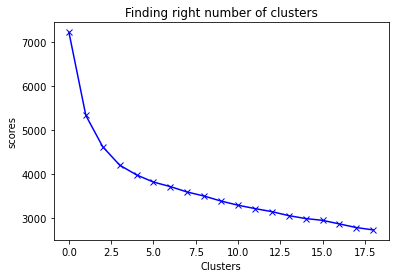

In [16]:
scores = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(econ_df_attr_sc)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

Usually, the Elbow method is enough to conclude how many clusters to use as a specification for the K-Mean+ algorithm. Yet, I have decided to cross-check with Silhouette analysis instead of the Elbow technique. Some think that the Silhouette analysis is better than the Elbow method because it allows one to calculate a silhouette coefficient and easily find the exact number of k. I would not be so critical about the Elbow method, since the Silhouette analysis also has its own weaknesses.

In our case,  a visual inspection of the graphs below gives us a clear understanding that the four-cluster solution is optimal -- all the plots of clusters are more or less of similar thickness and the coefficients for each cluster are above the average silhouette scores.

For n_clusters = 2 The average silhouette_score is : 0.22522356989197967
For n_clusters = 3 The average silhouette_score is : 0.22270648902275728
For n_clusters = 4 The average silhouette_score is : 0.15735529908149443
For n_clusters = 5 The average silhouette_score is : 0.15561941756897144
For n_clusters = 6 The average silhouette_score is : 0.14348009214222693


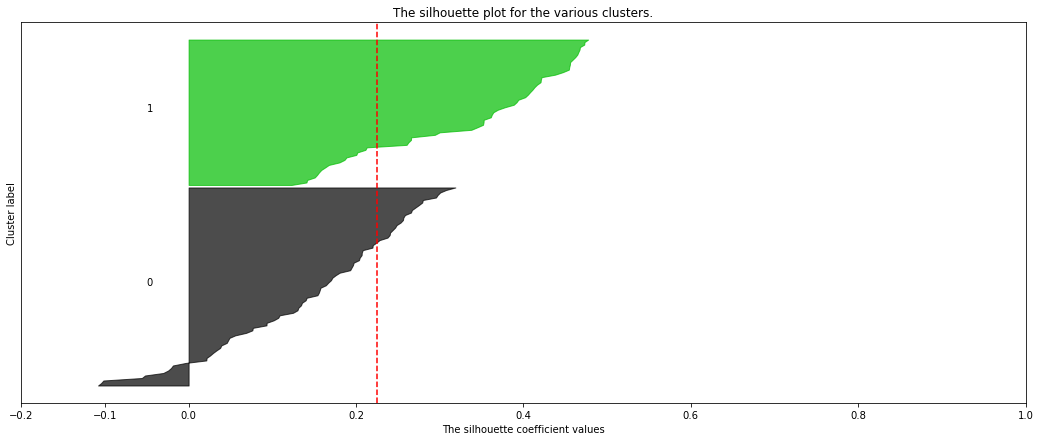

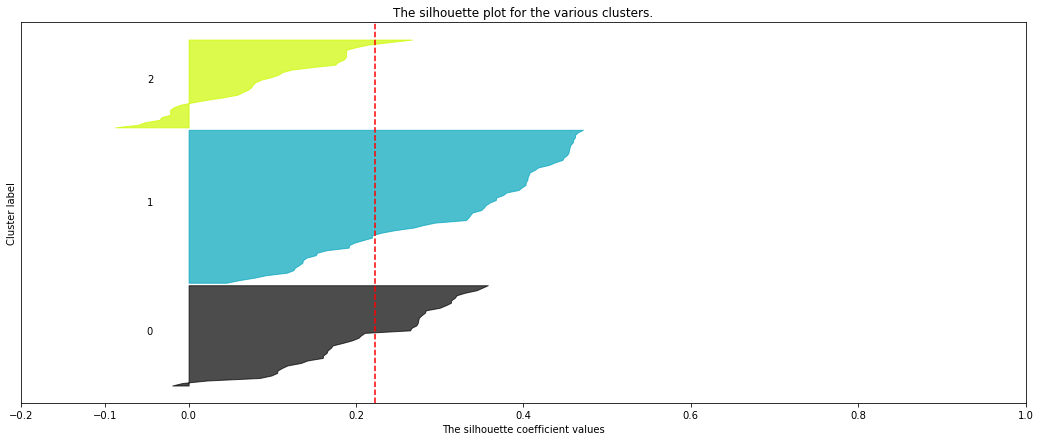

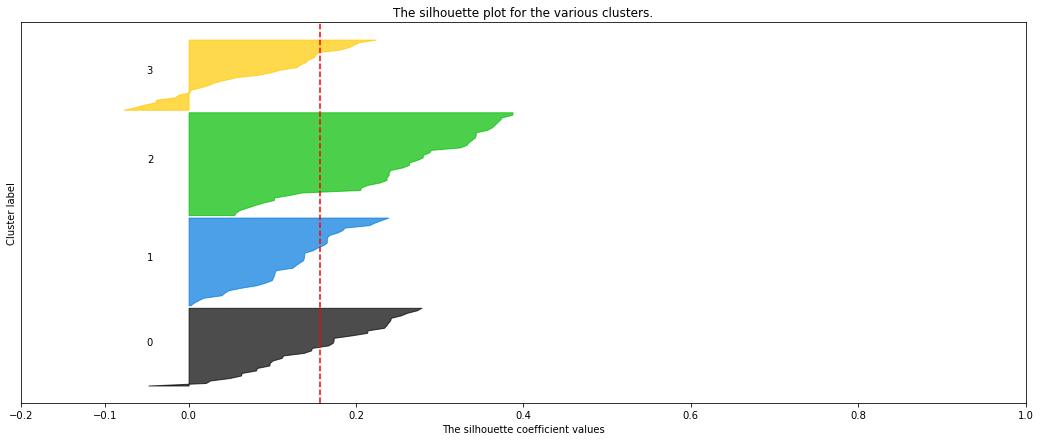

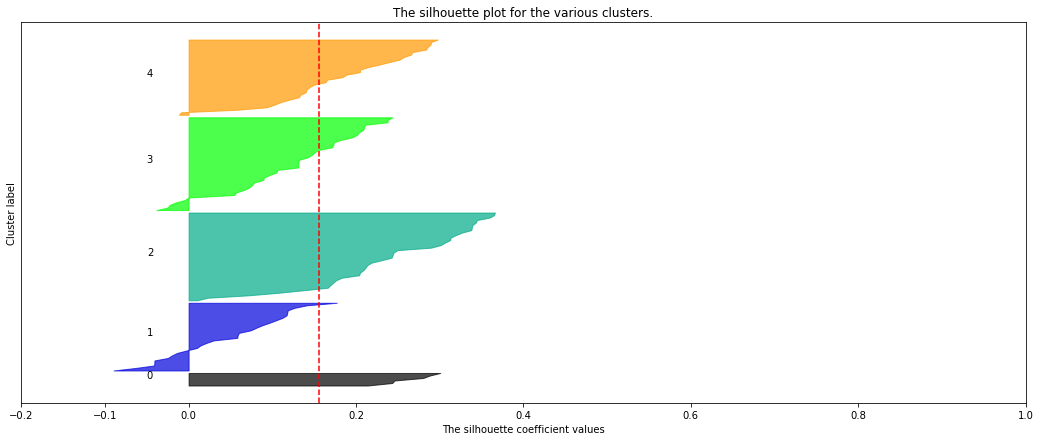

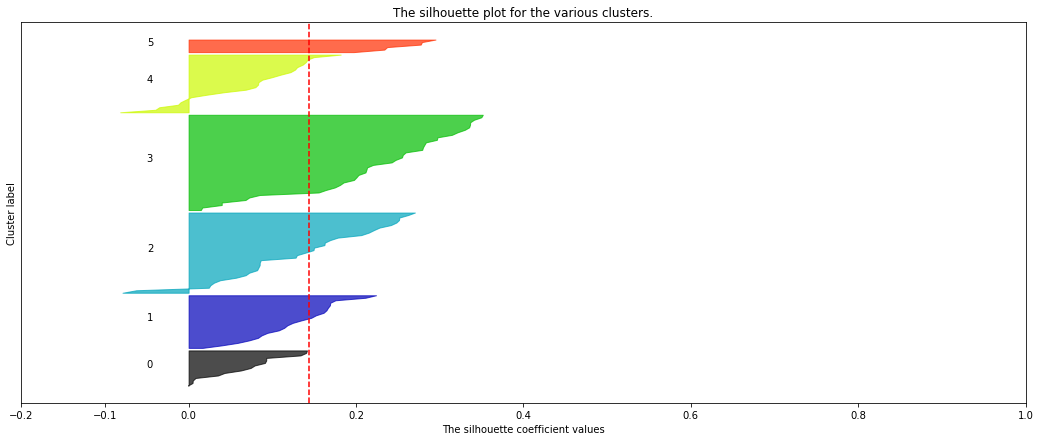

In [17]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(econ_df_attr_sc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(econ_df_attr_sc, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(econ_df_attr_sc, cluster_labels)

    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 0  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

Now, we can apply K-Mean+ method for clustering DS1. 

In [18]:
kmeans = KMeans(4)
kmeans.fit(econ_df_attr_sc)

KMeans(n_clusters=4)

In [19]:
labels = kmeans.labels_

In [20]:
kmeans.cluster_centers_.shape

(4, 52)

In [21]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_attr)
cluster_centers  

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
0  1.002324 -0.353383 -0.045605 -0.548268  0.077578  0.464202    0.198466   
1 -0.422036  0.946291 -0.980176 -0.543789  0.595193 -0.091102    0.500150   
2  0.011909  0.041124  0.117955  0.447375 -0.186261 -0.201305   -0.228619   
3 -0.426161 -1.022143  1.272373  0.757810 -0.681125 -0.088383   -0.616713   

   empl_ind  empl_serv  empl_agro  ...  death_rate  birth_rate  fertility  \
0  0.650035  -0.156995  -0.060092  ...   -0.808610    0.100997   0.091813   
1  0.224687   0.999750  -1.023403  ...    0.474188   -0.979124  -0.910742   
2  0.180726  -0.030973   0.127658  ...    0.046244   -0.017071  -0.091956   
3 -1.187493  -1.204456   1.335411  ...    0.087713    1.290830   1.296638   

   education   atheist  rus_lang  main_relig   arm_exp   arm_imp  mil_expend  
0   0.290194 -0.390457  0.625415    0.846830  0.051004  0.705362    0.312312  
1   0.768550  0.975509 -0.172133   -0.610737  0.683078  0.167463   -0.352447  
2   0.005135 -0.290052 -0.172133   -0.180917 -0.258316 -0.337711   -0.062417  
3  -1.372497 -0.617526 -0.172133    0.231332 -0.688722 -0.523299    0.258094  

[4 rows x 52 columns]

Above table says nothing to us. In order to interpret the results, we have to perform inverse transformation.

In [22]:
cluster_centers = ptransform.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = columns_attr)
cluster_centers

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
0  0.353736  0.517225  0.070405  0.539520  0.158768  0.263652    0.010143   
1  0.216415  0.659390  0.020839  0.540215  0.186624  0.218092    0.049022   
2  0.253808  0.559353  0.081532  0.695636  0.144802  0.209455   -0.051952   
3  0.216075  0.447804  0.209552  0.744952  0.119025  0.218307   -0.117372   

   empl_ind  empl_serv  empl_agro  ...  death_rate  birth_rate  fertility  \
0  0.255524   0.565220   0.155843  ...    5.457785   16.815315   2.228447   
1  0.220211   0.740695   0.037787  ...    8.958320    9.886890   1.511621   
2  0.216650   0.585907   0.185589  ...    7.712044   15.830638   2.065561   
3  0.113526   0.372531   0.492271  ...    7.829397   32.208043   4.048481   

   education   atheist  rus_lang  main_relig    arm_exp     arm_imp  \
0   0.764721  0.036614  0.002858    4.268721   2.164360  744.503743   
1   0.874052  0.153065  0.000000    1.666868  10.847319  215.066312   
2   0.693268  0.042118  0.000000    2.273918   0.959398   60.465681   
3   0.227412  0.025095  0.000000    2.971927   0.120505   36.741420   

   mil_expend  
0    0.056651  
1    0.033204  
2    0.042632  
3    0.054471  

[4 rows x 52 columns]

Let's postpone a detail analysis untill we implement K-Mean+ meathod for all of our datasets (DS1, DS2, and DS3)

In [23]:
y_kmeans = kmeans.fit_predict(econ_df_attr_sc)
y_kmeans

array([3, 2, 1, 3, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 3, 3, 0, 3, 3,
       0, 1, 2, 0, 3, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 3, 0, 0, 1, 3, 2,
       0, 3, 0, 2, 3, 3, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 0, 0, 3, 1, 3, 0, 2, 2, 2, 2, 1, 3, 3, 2, 3, 0, 0,
       1, 3, 3, 2, 0, 1, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 3, 1, 3, 2, 3,
       0, 0, 0, 2, 3, 0, 2, 3, 0, 0, 1, 3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 0,
       0, 0, 1, 1, 1, 3, 3], dtype=int32)

In [25]:
# concatenate the clusters labels to our original dataframe 
econ_df_ds1 = pd.concat([econ_df, pd.DataFrame({'cluster':labels})], axis = 1)
econ_df_ds1

country_id   country_name  post_ussr  industry   service      agro  \
0             1    Afghanistan          0  0.124709  0.560685  0.270136   
1             2        Albania          0  0.197050  0.484283  0.192521   
2             3        Algeria          0  0.342486  0.477798  0.142277   
3             6         Angola          0  0.447609  0.413944  0.094298   
4             8      Argentina          0  0.224695  0.543372  0.068361   
..          ...            ...        ...       ...       ...       ...   
134         203     Uzbekistan          1  0.327845  0.334992  0.260686   
135         205  Venezuela, RB          0  0.372447  0.516675  0.050268   
136         206        Vietnam          0  0.337241  0.416253  0.148532   
137         209         Zambia          0  0.427359  0.483204  0.027324   
138         210       Zimbabwe          0  0.126124  0.374405  0.050740   

      hh_cons   gov_exp    invest  net_export  ...  birth_rate  fertility  \
0    0.810000  0.280000  0.120000   -3.000000  ...      31.802      4.321   
1    0.802054  0.115183  0.241010   -0.148310  ...      11.620      1.597   
2    0.435004  0.169461  0.448293   -0.110499  ...      23.583      2.988   
3    0.558112  0.100041  0.227623    0.079529  ...      40.232      5.442   
4    0.646142  0.157710  0.137766    0.027272  ...      16.833      2.247   
..        ...       ...       ...         ...  ...         ...        ...   
134  0.541545  0.169007  0.374631   -0.104230  ...      24.300      2.785   
135  0.752896  0.146034  0.248102   -0.147032  ...      17.566      2.250   
136  0.681621  0.064606  0.266618    0.029228  ...      16.454      2.050   
137  0.422491  0.176842  0.392619    0.004813  ...      35.776      4.559   
138  0.470687  0.156525  0.057110   -0.073343  ...      29.747      3.531   

     education  atheist  rus_lang  main_relig  arm_exp  arm_imp  mil_expend  \
0     0.041000    0.009         0         6.0        0     1384    0.044897   
1     0.289235    0.009         0         6.0        0       11    0.046681   
2     0.473000    0.018         0         6.0        0     6027    0.169896   
3     0.289000    0.052         0         2.0        0      745    0.077938   
4     0.459000    0.121         0         2.0        0      139    0.017114   
..         ...      ...       ...         ...      ...      ...         ...   
134   0.999172    0.009         0         6.0       68      286    0.035500   
135   0.744302    0.097         0         2.0        0      188    0.000000   
136   0.653398    0.299         0         3.0        0     2496    0.000000   
137   0.217000    0.009         0         2.0        0      126    0.047805   
138   0.649352    0.076         0         2.0        0        0    0.000000   

     cluster  
0          3  
1          2  
2          0  
3          3  
4          2  
..       ...  
134        0  
135        0  
136        0  
137        3  
138        3  

[139 rows x 56 columns]

In [ ]:
# Execure this comand if you need to export the dataframe to Excel
econ_df_ds1.to_excel("ds1_4cl.xlsx")     

## 4.A.b Checking H1 using DS2

**How do we prepare DS2 (with only feature techniques of DR)?**

In feature selection techniques, I am going to test the attributes for their importance and then decide whether we select them or eliminate them. Two filters will be implemented: (a) a low variance filter and (b) a high correlation filter.

To drop attributes that are worthless for our analysis, I am implementing a low variance filter. The main assumption is that if an attribute does not vary much from country to country in our data set, then we can state that it has an almost constant value and does not contribute to the robustness of our model. 

I use the dataset that has been already normalized because variance is range-dependent. The normalization scales each attribution separately to the same range 0-1, which is important since our variables -- countries' characteristics -- have different measurement units. 


In [26]:
#NORMALIZATION

#Normalize the datapoins of attributes usin MinMax method
trans = MinMaxScaler()
econ_df_attr_norm = trans.fit_transform(econ_df_attr)

#Back to DataFrame with attribution titles
econ_df_attr_norm = pd.DataFrame(data = econ_df_attr_norm, columns = [columns_attr]) 

In [27]:
#Check variance of our dataset
econ_df_attr_norm.var()

industry            0.033333
service             0.032422
agro                0.031265
hh_cons             0.026255
gov_exp             0.040585
invest              0.038302
net_export          0.007220
empl_ind            0.024159
empl_serv           0.061311
empl_agro           0.073651
gdp_growth_ave      0.040156
infl_ave            0.011729
unempl_ave          0.029153
empl_ave            0.053002
fisc_bal_ave        0.025092
gov_debt_ave        0.023808
cur_bal_ave         0.016264
gdp_perc_ppp        0.036972
gini                0.021515
povert              0.042299
electro             0.065479
elecdem             0.080985
parpipdem           0.069660
delibdem            0.089035
frefair             0.100104
jucon               0.094351
legcon              0.096124
cspart              0.057784
locelec             0.104310
eltrnout            0.087814
clrelig             0.040153
clstown             0.050917
svstterr            0.031457
mediacens           0.060469
womempow      

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



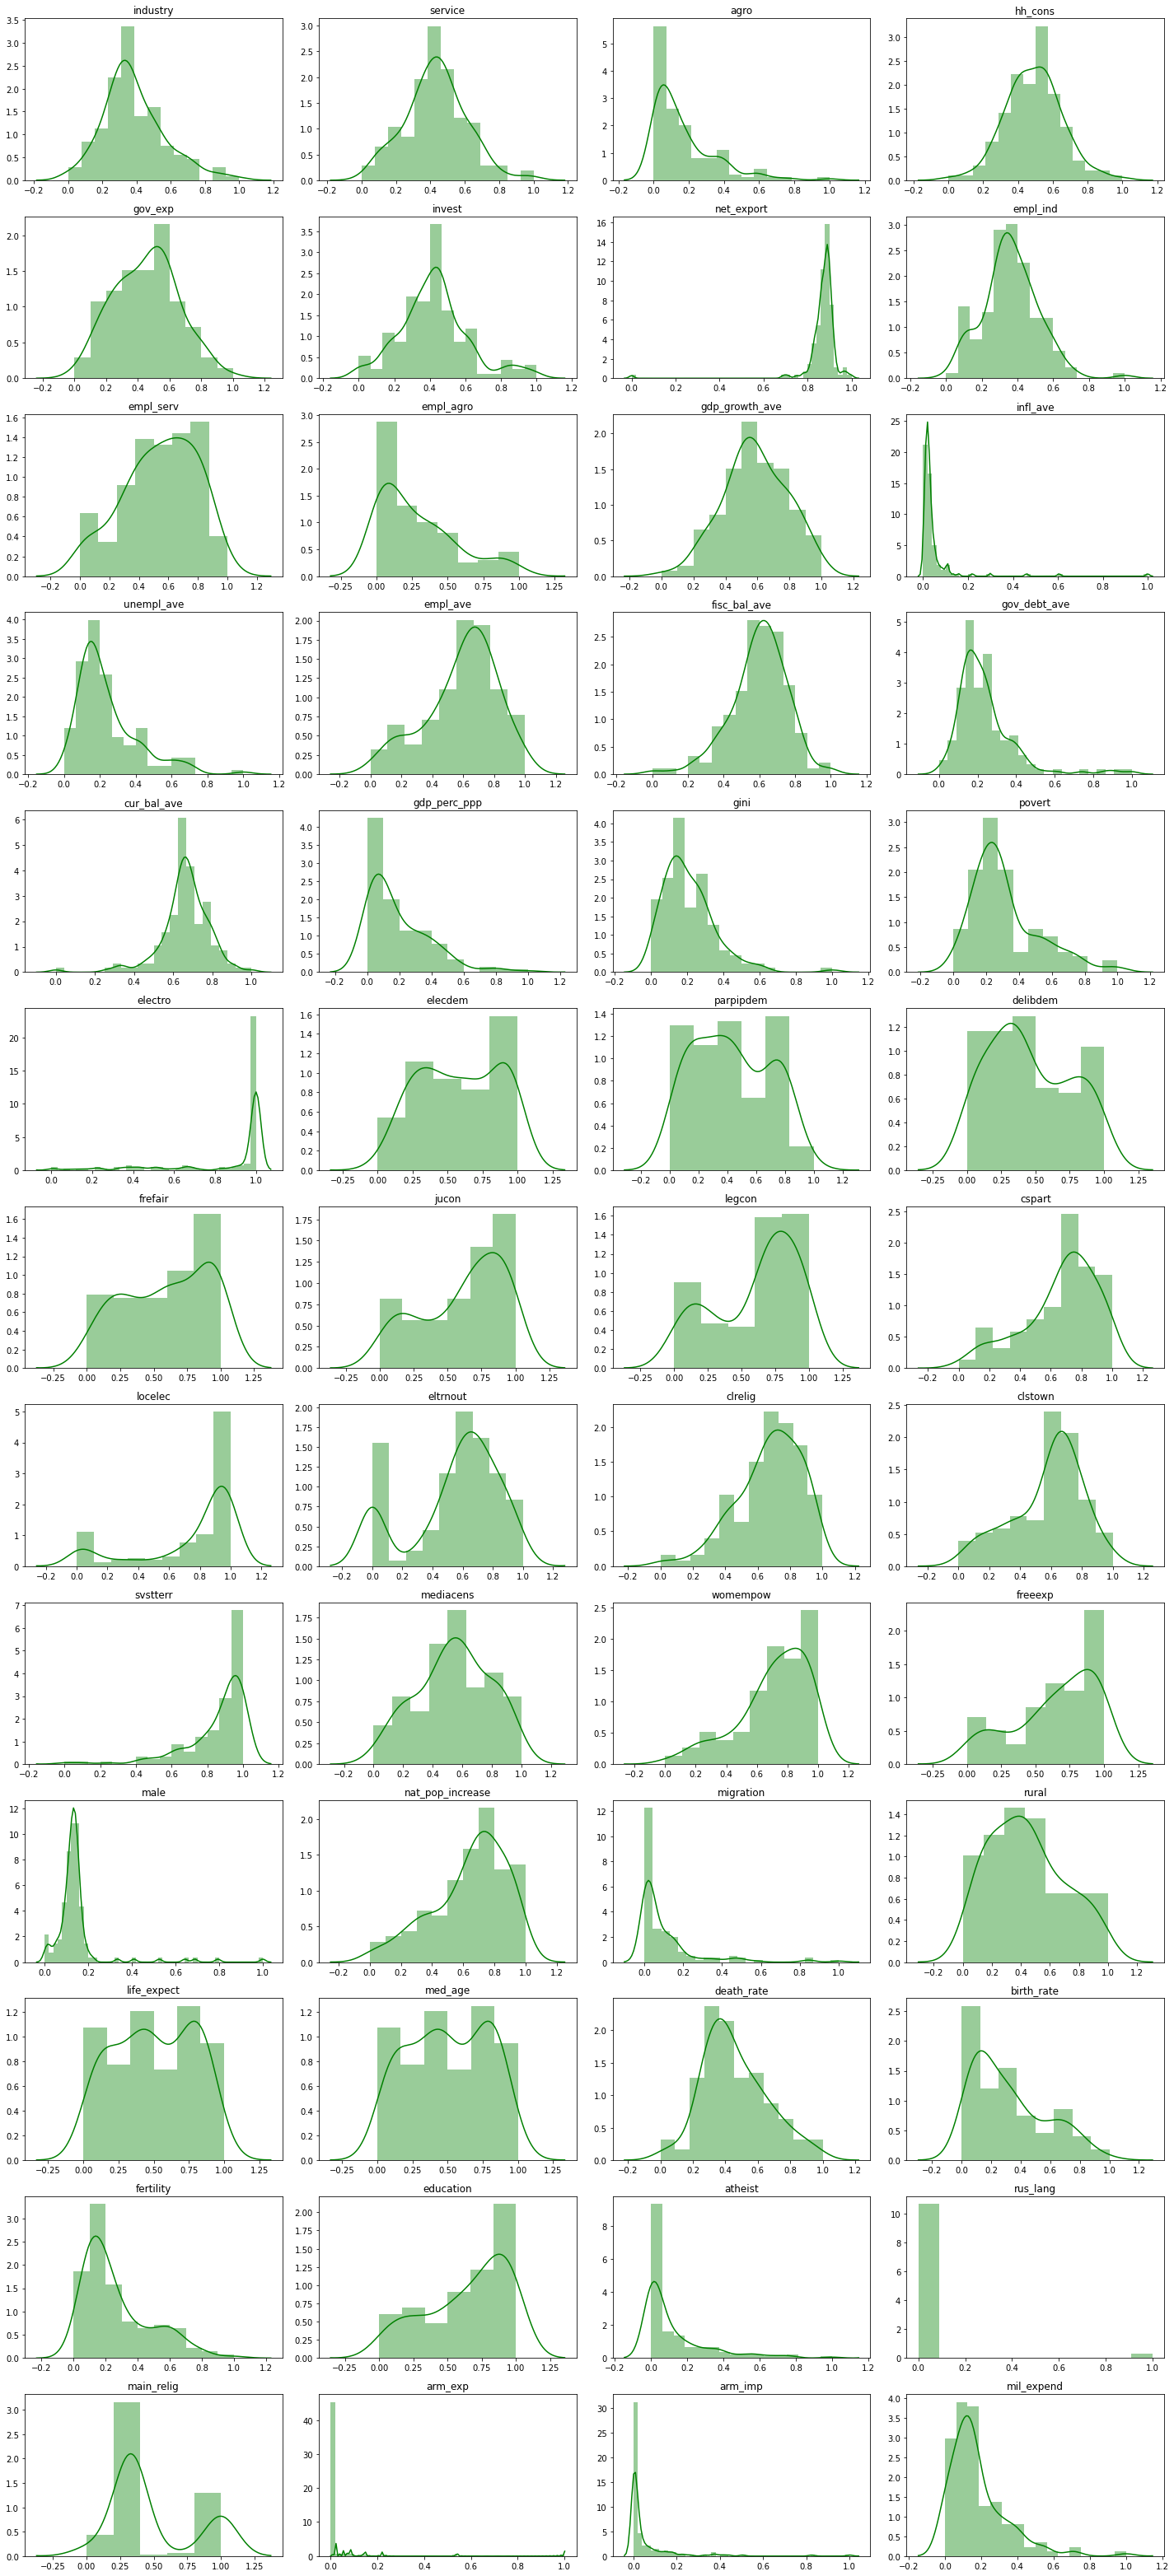

In [28]:
#Create a density plot for checking variance
plt.figure(figsize = (20, 50))
for k in range(len(columns_attr)):
  plt.subplot(15, 4, k+1)
  sns.distplot(econ_df_attr_norm[[columns_attr[k]]], color = 'g');
  plt.title(columns_attr[k])
plt.tight_layout()

There is no conventional method to choose a threshold for this filter. Visual inspection of the histograms allows us to set such a threshold at the level of 0.01.

For categorical variables (we do not have them here), we should look at the frequency distribution of the categories. And if a single category is repeating more frequently (more than 95%), we can then drop that variable. 

We can drop two variables based on variance analysis: "rus_lang" (categorical data), 'arm_exp' (variance lover than 0.01), and 'electro'. Let's put it on the list.

In [29]:
elimin_ds2 = ['rus_lang','arm_exp', 'electro']

Next, we implement another filter -- a high correlation filter.

In [30]:
econ_df_attr_norm.corr()

industry   service      agro   hh_cons   gov_exp    invest  \
industry          1.000000 -0.360737 -0.248913 -0.480288 -0.063222  0.297983   
service          -0.360737  1.000000 -0.682393 -0.198307  0.401059 -0.200964   
agro             -0.248913 -0.682393  1.000000  0.574672 -0.421449  0.042739   
hh_cons          -0.480288 -0.198307  0.574672  1.000000 -0.327792 -0.422430   
gov_exp          -0.063222  0.401059 -0.421449 -0.327792  1.000000 -0.080941   
invest            0.297983 -0.200964  0.042739 -0.422430 -0.080941  1.000000   
net_export        0.307201  0.100394 -0.359473 -0.427179 -0.153375  0.074857   
empl_ind          0.345564  0.203857 -0.494584 -0.366833  0.241231  0.217083   
empl_serv        -0.046550  0.736071 -0.734190 -0.342338  0.425468 -0.162677   
empl_agro        -0.098098 -0.691341  0.804814  0.429182 -0.448446  0.049103   
gdp_growth_ave   -0.037071 -0.339874  0.378625  0.112363 -0.376195  0.306761   
infl_ave          0.057659 -0.152049  0.094957  0.236997 -0.201876 -0.146022   
unempl_ave       -0.058861  0.098909 -0.164777  0.153105  0.098797 -0.260381   
empl_ave         -0.039199  0.139875 -0.131456 -0.298569  0.099381  0.097141   
fisc_bal_ave      0.017942 -0.028875  0.010600 -0.164651  0.003579  0.096759   
gov_debt_ave     -0.104376  0.138284 -0.136549  0.096735  0.037433 -0.136168   
cur_bal_ave       0.229438  0.343606 -0.497294 -0.490781  0.177828 -0.063933   
gdp_perc_ppp      0.057029  0.606075 -0.627378 -0.624203  0.345713  0.057884   
gini              0.201369 -0.069521  0.033522  0.075103 -0.046668 -0.097212   
povert           -0.120380 -0.276341  0.449835  0.466845 -0.171172 -0.330112   
electro           0.161580  0.500612 -0.712549 -0.390798  0.309906  0.068392   
elecdem          -0.425219  0.512816 -0.316740 -0.042783  0.300627 -0.165539   
parpipdem        -0.410584  0.518922 -0.346923 -0.080607  0.320059 -0.168749   
delibdem         -0.391586  0.496764 -0.305450 -0.126712  0.348347 -0.135907   
frefair          -0.243117  0.596550 -0.491741 -0.226986  0.377982 -0.115792   
jucon            -0.344613  0.466572 -0.299407 -0.054285  0.290115 -0.147278   
legcon           -0.372786  0.366894 -0.200137  0.007453  0.306149 -0.148188   
cspart           -0.511177  0.307081 -0.041829  0.139724  0.171769 -0.195485   
locelec          -0.319279  0.362361 -0.226490  0.061568  0.160382 -0.177425   
eltrnout         -0.001686  0.020633 -0.106469 -0.177203  0.017854  0.056778   
clrelig          -0.386760  0.323560 -0.162219  0.134875  0.129969 -0.265409   
clstown          -0.440908  0.315025 -0.040480  0.287098 -0.000224 -0.217564   
svstterr          0.146496  0.224233 -0.443027 -0.412797  0.158710  0.161073   
mediacens        -0.408913  0.367027 -0.156243  0.006975  0.268916 -0.157406   
womempow         -0.438517  0.416907 -0.283921 -0.047554  0.244815 -0.071417   
freeexp          -0.455132  0.354110 -0.105192  0.113882  0.204725 -0.161493   
male              0.502030 -0.081530 -0.101612 -0.333600  0.120923  0.171450   
nat_pop_increase -0.022215  0.699361 -0.739080 -0.449662  0.411281  0.070446   
migration         0.230886  0.343452 -0.385358 -0.410468  0.205425  0.040923   
rural            -0.087517 -0.355890  0.428691  0.302085 -0.311004 -0.025782   
life_expect      -0.051373  0.646140 -0.702927 -0.422665  0.425776 -0.023802   
med_age          -0.051373  0.646140 -0.702927 -0.422665  0.425776 -0.023802   
death_rate       -0.328549  0.088588 -0.012845  0.146631  0.097681 -0.213850   
birth_rate        0.000981 -0.643916  0.736087  0.392888 -0.380225  0.021817   
fertility         0.002274 -0.620161  0.714978  0.358247 -0.319091  0.030919   
education         0.148993  0.467263 -0.711027 -0.457643  0.350048  0.029566   
atheist          -0.131637  0.402312 -0.356019 -0.276726  0.281238  0.024441   
rus_lang          0.085041 -0.049412 -0.047273 -0.046373 -0.012701  0.076664   
main_relig        0.186947 -0.306134  0.298513  0.055527 -0.151991  0.120793   
arm_exp          -

In [31]:
#Run a high correlation filter
econ_df_attr_norm_cr = econ_df_attr_norm
correlation = econ_df_attr_norm_cr.corr()
correlation_abs = abs(correlation)
econ_df_attr_norm_cr_columns = econ_df_attr_norm_cr.columns

high_corr = [ ]

for c1 in econ_df_attr_norm_cr_columns:
  for c2 in econ_df_attr_norm_cr_columns:
    if c1 != c2 and c2 not in high_corr and correlation_abs[c1][c2] > 0.9:
      high_corr.append(c1)
    
high_corr

[('empl_serv',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('parpipdem',),
 ('mediacens',),
 ('life_expect',),
 ('life_expect',),
 ('med_age',),
 ('birth_rate',)]

In [32]:
high_corr = ['empl_serv', 'elecdem', 'mediacens', 'life_expect', 'med_age', 'birth_rate']

elimin_ds2 = ['electro', 'rus_lang','arm_exp','empl_serv', 'elecdem', 'mediacens', 'life_expect', 'med_age', 'birth_rate']
elimin_ds2

['electro',
 'rus_lang',
 'arm_exp',
 'empl_serv',
 'elecdem',
 'mediacens',
 'life_expect',
 'med_age',
 'birth_rate']

We impose the threshold at 0.9 (Again, there is no common method to identify such a threshold).  

In [33]:
# Uncomment if visual inspection of correlation is required
#fig = plt.figure(figsize = (20,20))
#sns.pairplot(econ_df_attr_norm)

In [34]:
econ_df_attr_norm_ds2 = econ_df_attr_norm.drop(['electro', 'rus_lang','arm_exp','empl_serv', 'parpipdem', 'mediacens', 'life_expect', 'med_age', 'birth_rate'], axis=1)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [35]:
#Remove from the list attributes that are not needed for destribution analysis
elimin_ds2 = ['electro', 'country_id','country_name', 'post_ussr', 'rus_lang','arm_exp','empl_serv', 'parpipdem', 'mediacens', 'life_expect', 'med_age', 'birth_rate']
columns_attr_ds2 = [ elem for elem in columns if elem not in elimin_ds2]


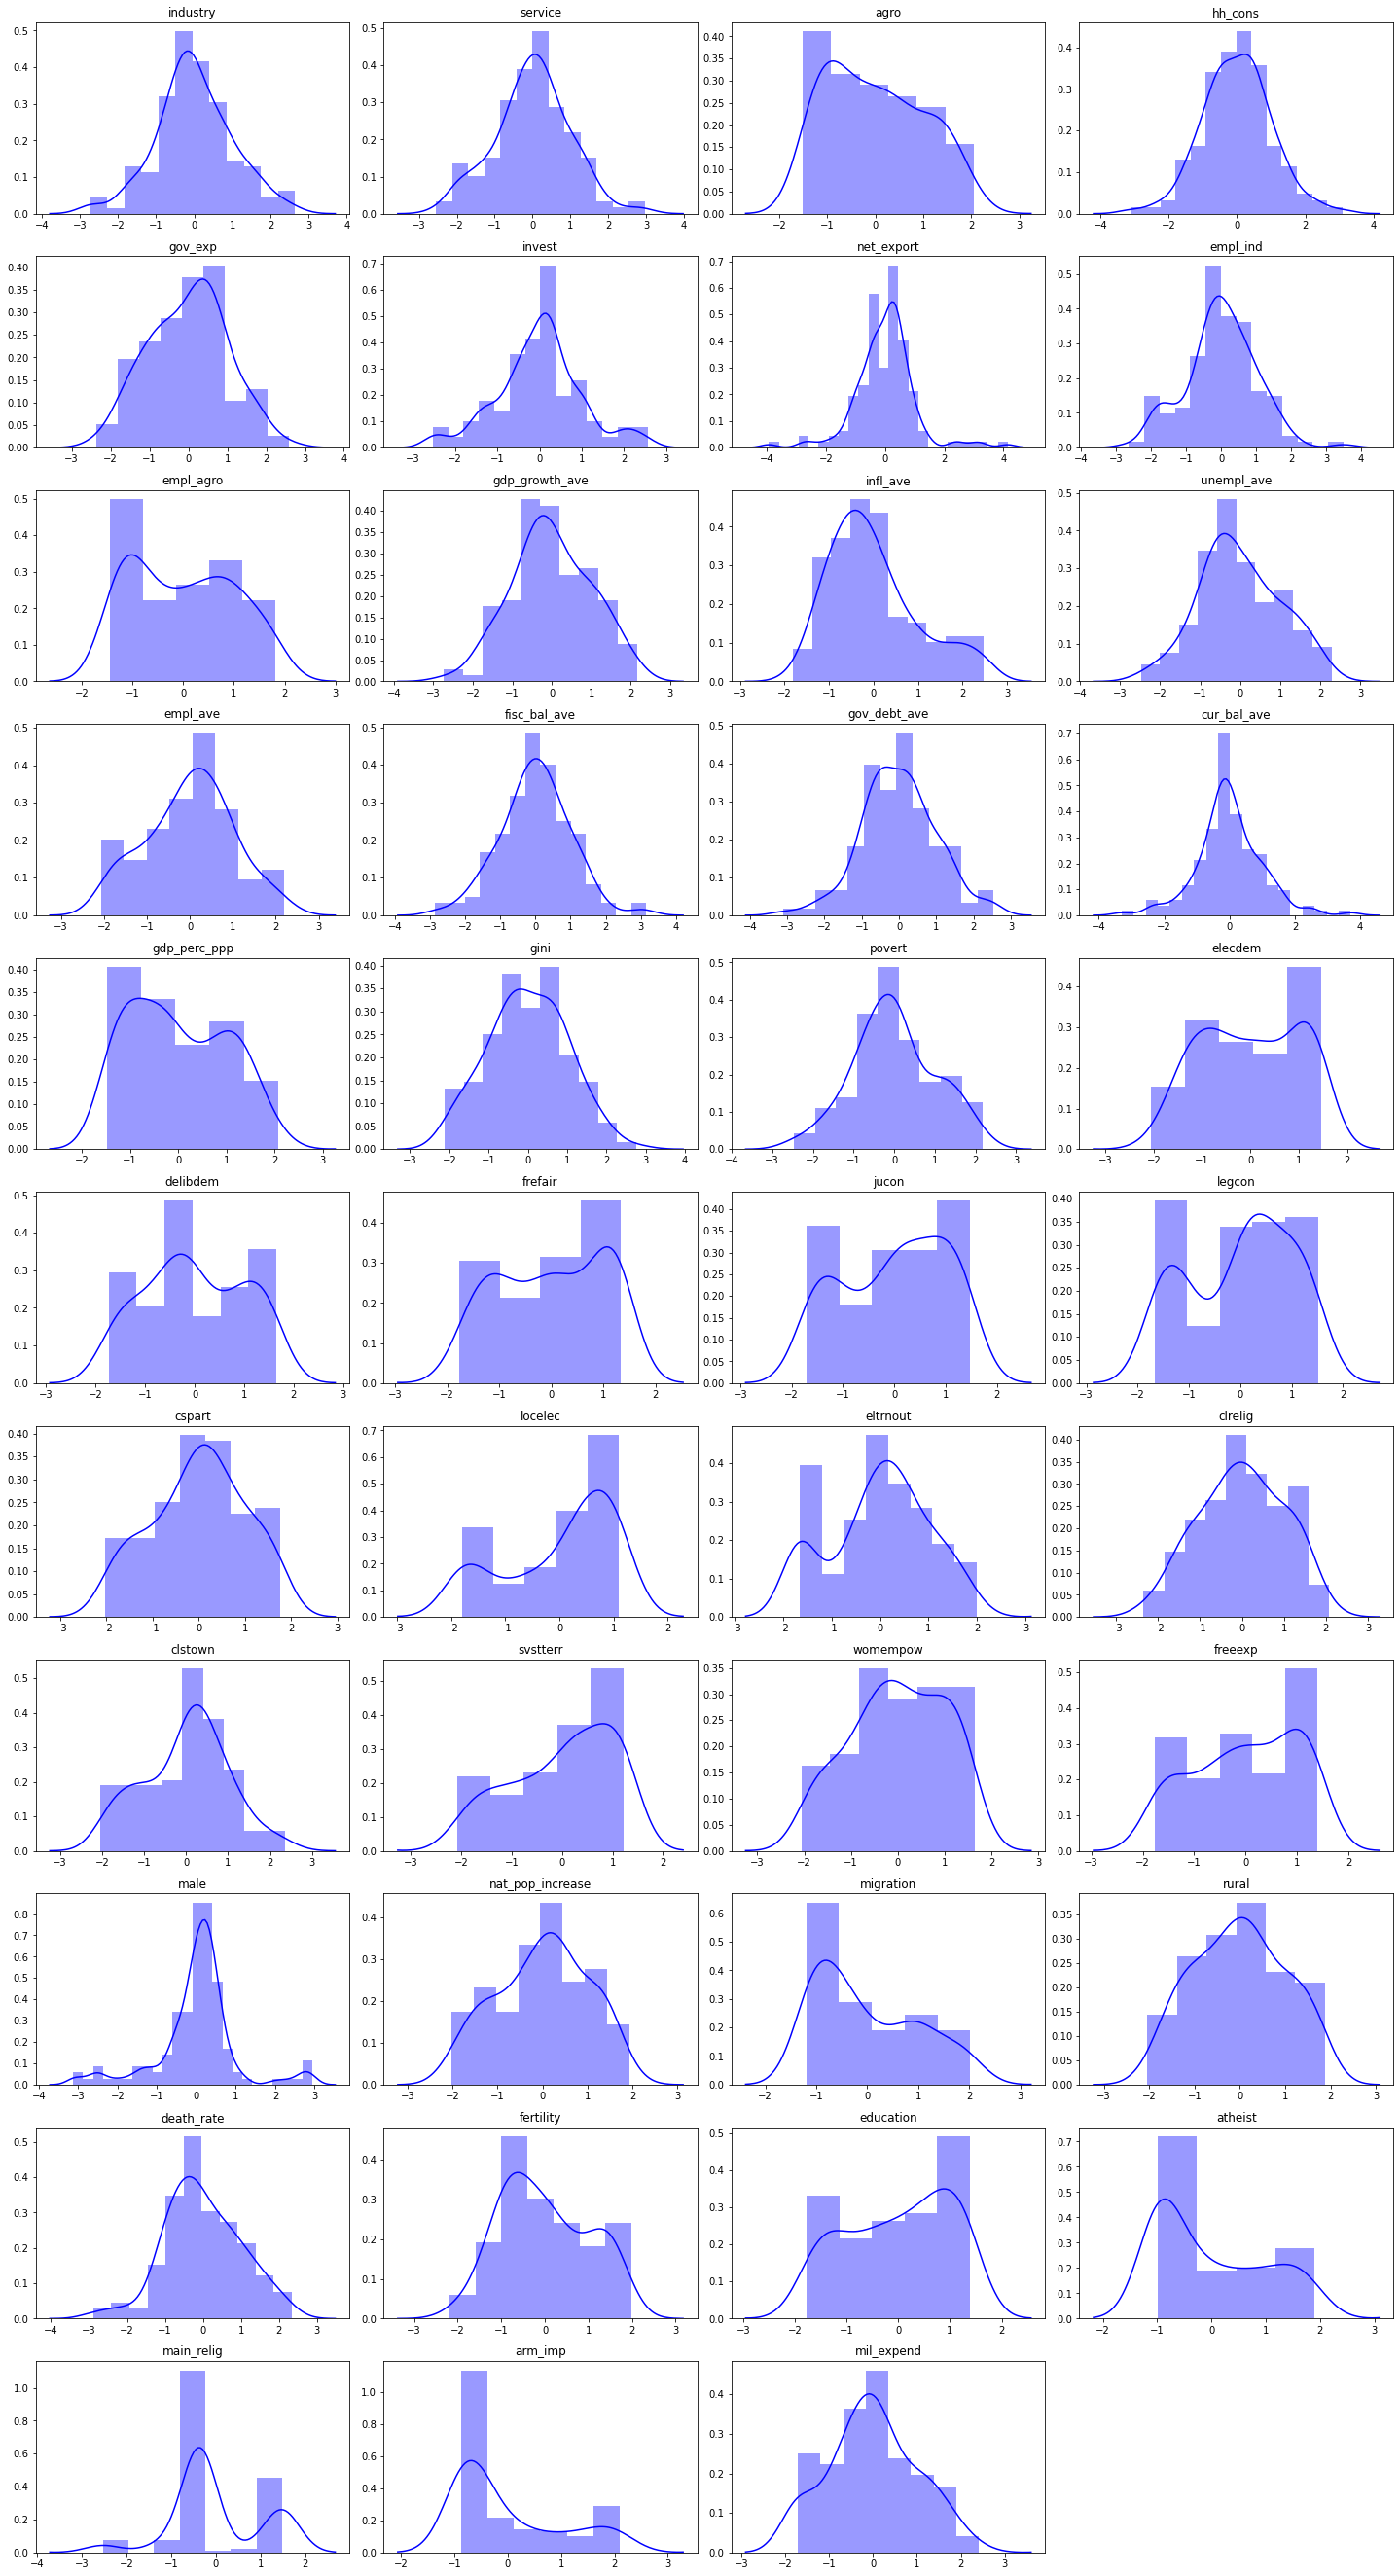

In [36]:
#SCALING NORMALIZED DATA

#Scale the data with powertransformation 
ptransform = PowerTransformer(method='yeo-johnson')
econ_df_attr_norm_ds2_sc = ptransform.fit_transform(econ_df_attr_norm_ds2)

#Back to DataFrame with attribution titles
econ_df_attr_norm_ds2_sc = pd.DataFrame(data = econ_df_attr_norm_ds2_sc, columns = [columns_attr_ds2]) 

#Create a density plot for each attribute for visual inspection after scaling
plt.figure(figsize = (20, 50))
for k in range(len(columns_attr_ds2)):
  plt.subplot(15, 4, k+1)
  sns.distplot(econ_df_attr_norm_ds2_sc[[columns_attr_ds2[k]]], color = 'b');
  plt.title(columns_attr_ds2[k])
plt.tight_layout()

In [37]:
econ_df_attr_norm_ds2_sc.describe()

industry       service          agro       hh_cons       gov_exp  \
count  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   
mean  -1.166134e-16 -1.166134e-16  1.066293e-16  1.437699e-16  2.083665e-16   
std    1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   
min   -2.735375e+00 -2.550501e+00 -1.513470e+00 -3.125689e+00 -2.373714e+00   
25%   -5.598918e-01 -5.957906e-01 -9.090281e-01 -6.528122e-01 -7.688136e-01   
50%   -4.693319e-02  3.113250e-02 -1.024208e-01  8.306966e-02  8.241365e-02   
75%    6.364636e-01  5.551367e-01  7.803298e-01  5.653613e-01  6.659735e-01   
max    2.646231e+00  2.971771e+00  2.058642e+00  3.081517e+00  2.588483e+00   

             invest    net_export      empl_ind     empl_agro gdp_growth_ave  \
count  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   1.390000e+02   
mean  -2.555909e-17  6.721242e-16  2.156548e-16 -4.792330e-17   8.306705e-17   
std    1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   1.003617e+00   
min   -2.527316e+00 -3.930482e+00 -2.638546e+00 -1.437071e+00  -2.735422e+00   
25%   -4.838867e-01 -4.428533e-01 -5.267511e-01 -9.982882e-01  -5.878458e-01   
50%    7.774923e-02  1.042028e-01 -1.276020e-02 -3.959515e-02  -4.713898e-02   
75%    4.607239e-01  4.521273e-01  6.232148e-01  8.212098e-01   7.442542e-01   
max    2.569740e+00  4.143565e+00  3.501526e+00  1.809713e+00   2.163834e+00   

       ... nat_pop_increase     migration         rural    death_rate  \
count  ...     1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02   
mean   ...    -2.396165e-17  8.546321e-17  1.485622e-16 -2.981228e-16   
std    ...     1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00   
min    ...    -2.026614e+00 -1.195046e+00 -2.037744e+00 -2.885964e+00   
25%    ...    -6.970018e-01 -8.929448e-01 -8.637026e-01 -6.572729e-01   
50%    ...     8.708940e-02 -2.624593e-01  2.219317e-02 -1.358948e-01   
75%    ...     6.704438e-01  8.498135e-01  8.291896e-01  6.475225e-01   
max    ...     1.936729e+00  2.021484e+00  1.874611e+00  2.336348e+00   

          fertility     education       atheist    main_relig     arm_imp  \
count  1.390000e+02  1.390000e+02  1.390000e+02  1.390000e+02  139.000000   
mean  -3.162938e-16  2.290334e-16 -6.509581e-17  3.170925e-16    0.000000   
std    1.003617e+00  1.003617e+00  1.003617e+00  1.003617e+00    1.003617   
min   -2.187813e+00 -1.768620e+00 -9.829544e-01 -2.520534e+00   -0.867023   
25%   -7.736651e-01 -8.308402e-01 -9.829544e-01 -3.665374e-01   -0.798069   
50%   -1.305648e-01  1.136065e-01 -3.293926e-01 -3.665374e-01   -0.513644   
75%    8.471703e-01  8.578483e-01  8.819130e-01  1.327145e+00    0.655678   
max    1.983276e+00  1.380782e+00  1.894230e+00  1.482458e+00    2.098083   

         mil_expend  
count  1.390000e+02  
mean   1.421724e-16  
std    1.003617e+00  
min   -1.712574e+00  
25%   -6.191734e-01  
50%    8.940089e-03  
75%    7.444327e-01  
max    2.410177e+00  

[8 rows x 43 columns]

Finally, we have a dataset (DS2), normalized and scaled, that we can use to feed to the K-Mean+ algorithm. The Elbow method and the Silhouette techniques again give an optimal number of clusters for analysis equal to 4.  

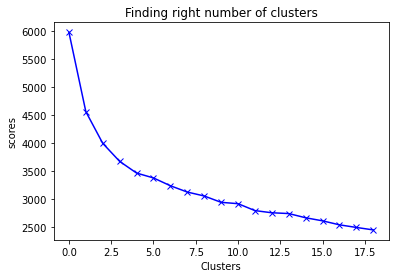

In [38]:
scores = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(econ_df_attr_norm_ds2_sc)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2041919526699082
For n_clusters = 3 The average silhouette_score is : 0.19280785388129096
For n_clusters = 4 The average silhouette_score is : 0.141352430829938
For n_clusters = 5 The average silhouette_score is : 0.14617150384106037
For n_clusters = 6 The average silhouette_score is : 0.1342433467929841


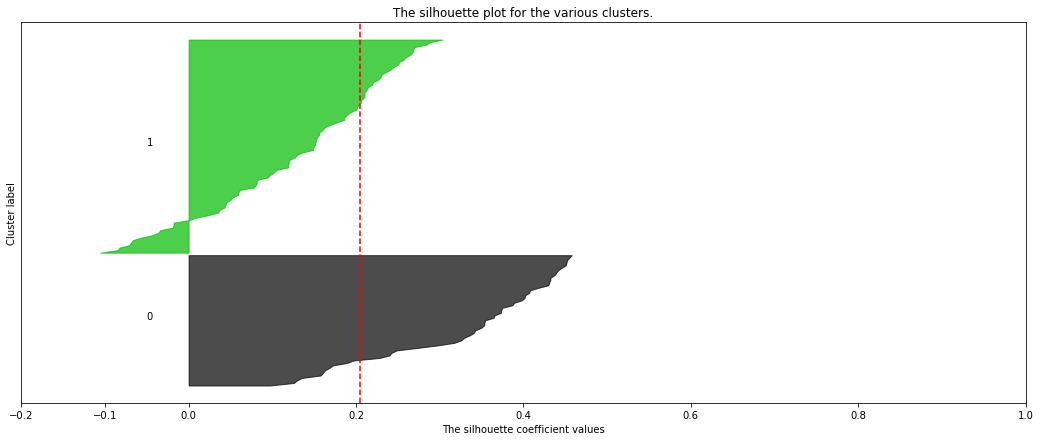

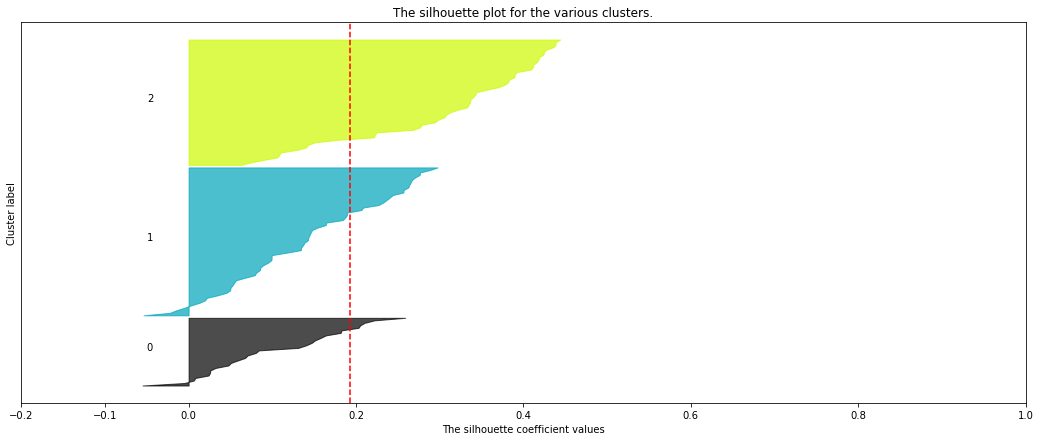

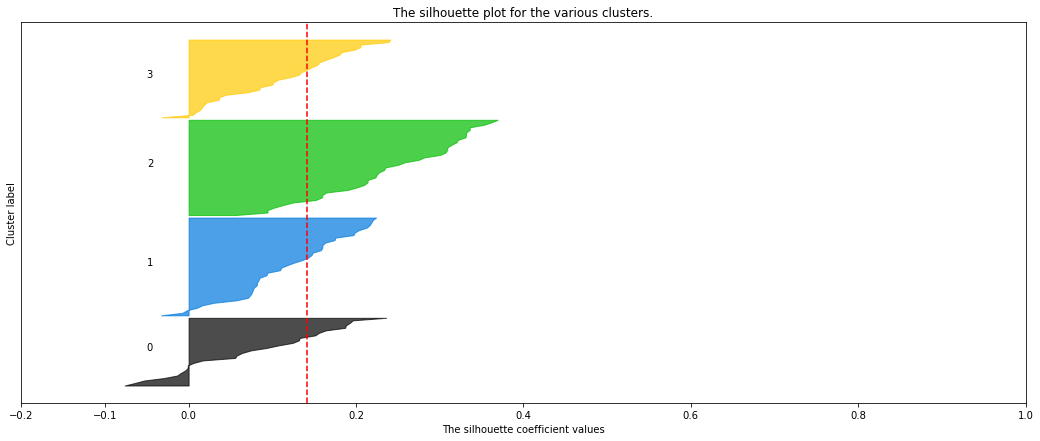

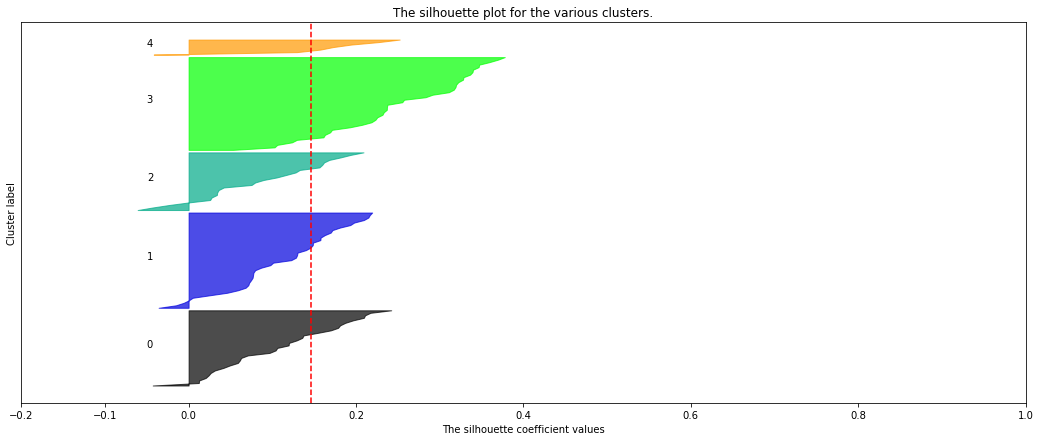

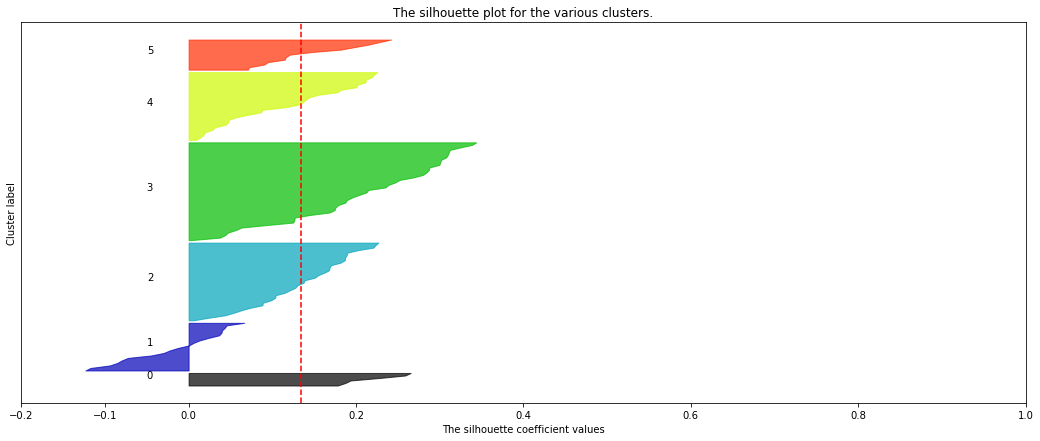

In [39]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(econ_df_attr_norm_ds2_sc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(econ_df_attr_norm_ds2_sc, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(econ_df_attr_norm_ds2_sc, cluster_labels)

    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 0  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

In [40]:
kmeans = KMeans(n_clusters = 4, random_state=10)
kmeans.fit(econ_df_attr_norm_ds2_sc)

KMeans(n_clusters=4, random_state=10)

In [41]:
labels = kmeans.labels_

In [42]:
kmeans.cluster_centers_.shape

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_attr_ds2)
cluster_centers  

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
0  0.021527  0.033759  0.080756  0.401244 -0.142397 -0.187894   -0.205398   
1  1.020985 -0.346452 -0.069822 -0.597212  0.073751  0.454551    0.254297   
2 -0.409663 -0.980329  1.244731  0.773025 -0.672991 -0.101362   -0.633506   
3 -0.443715  0.978018 -0.992783 -0.557328  0.606936 -0.067796    0.506865   

   empl_ind  empl_agro  gdp_growth_ave  ...  nat_pop_increase  migration  \
0  0.248771   0.079344        0.043981  ...         -0.096983  -0.410755   
1  0.651127  -0.066524       -0.086127  ...         -0.026066   0.147992   
2 -1.143720   1.310338        0.457632  ...         -1.313538  -0.677835   
3  0.171764  -1.044642       -0.335103  ...          1.131448   0.818514   

      rural  death_rate  fertility  education   atheist  main_relig   arm_imp  \
0 -0.069722    0.137539  -0.124699   0.110122 -0.312830   -0.145587 -0.346315   
1 -0.257694   -0.808798   0.053040   0.260129 -0.372788    0.826226  0.811118   
2  0.748788    0.048170   1.278085  -1.359060 -0.579174    0.209658 -0.478883   
3 -0.325504    0.414946  -0.907387   0.757309  1.024141   -0.619551  0.120731   

   mil_expend  
0   -0.065749  
1    0.317400  
2    0.260788  
3   -0.368120  

[4 rows x 43 columns]

In [43]:
cluster_centers = ptransform.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = columns_attr_ds2)
cluster_centers

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
0  0.369561  0.432478  0.127004  0.553174  0.419741  0.375806    0.870423   
1  0.564309  0.364839  0.110638  0.392210  0.463089  0.501380    0.889361   
2  0.297768  0.255113  0.335398  0.613909  0.315294  0.392097    0.850760   
3  0.292368  0.606290  0.032734  0.398578  0.571962  0.398467    0.898972   

   empl_ind  empl_agro  gdp_growth_ave  ...  nat_pop_increase  migration  \
0  0.392614   0.234682        0.599805  ...          0.657651   0.034047   
1  0.457295   0.204359        0.573967  ...          0.672510   0.066851   
2  0.188458   0.645353        0.680856  ...          0.333687   0.021226   
3  0.380537   0.047317        0.524035  ...          0.881191   0.124808   

      rural  death_rate  fertility  education   atheist  main_relig   arm_imp  \
0  0.394075    0.469839   0.193332   0.717850  0.040518    0.384469  0.013080   
1  0.348724    0.297170   0.219272   0.755493  0.036354    0.683223  0.057771   
2  0.615815    0.452327   0.512539   0.226241  0.022926    0.477713  0.009486   
3  0.332827    0.525939   0.101857   0.871015  0.194493    0.280140  0.027639   

   mil_expend  
0    0.136753  
1    0.183774  
2    0.176260  
3    0.105009  

[4 rows x 43 columns]

In [44]:
cluster_centers.to_excel("ds2cl4_centers.xlsx")

In [45]:
y_kmeans = kmeans.fit_predict(econ_df_attr_norm_ds2_sc)
y_kmeans

array([2, 0, 1, 2, 0, 0, 3, 3, 1, 1, 1, 1, 3, 0, 0, 0, 0, 2, 2, 3, 2, 2,
       3, 1, 0, 3, 2, 3, 1, 3, 3, 3, 0, 0, 1, 0, 1, 3, 2, 3, 3, 0, 2, 0,
       3, 0, 3, 0, 2, 2, 3, 3, 3, 0, 0, 1, 1, 3, 3, 3, 0, 3, 1, 1, 2, 3,
       1, 0, 3, 0, 2, 3, 3, 2, 1, 2, 3, 0, 0, 0, 0, 1, 2, 2, 0, 2, 3, 3,
       1, 2, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       3, 3, 3, 0, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 3,
       3, 3, 1, 1, 1, 2, 2], dtype=int32)

In [46]:
econ_df_ds2 = pd.concat([econ_df, pd.DataFrame({'cluster':labels})], axis = 1)
econ_df_ds2

country_id   country_name  post_ussr  industry   service      agro  \
0             1    Afghanistan          0  0.124709  0.560685  0.270136   
1             2        Albania          0  0.197050  0.484283  0.192521   
2             3        Algeria          0  0.342486  0.477798  0.142277   
3             6         Angola          0  0.447609  0.413944  0.094298   
4             8      Argentina          0  0.224695  0.543372  0.068361   
..          ...            ...        ...       ...       ...       ...   
134         203     Uzbekistan          1  0.327845  0.334992  0.260686   
135         205  Venezuela, RB          0  0.372447  0.516675  0.050268   
136         206        Vietnam          0  0.337241  0.416253  0.148532   
137         209         Zambia          0  0.427359  0.483204  0.027324   
138         210       Zimbabwe          0  0.126124  0.374405  0.050740   

      hh_cons   gov_exp    invest  net_export  ...  birth_rate  fertility  \
0    0.810000  0.280000  0.120000   -3.000000  ...      31.802      4.321   
1    0.802054  0.115183  0.241010   -0.148310  ...      11.620      1.597   
2    0.435004  0.169461  0.448293   -0.110499  ...      23.583      2.988   
3    0.558112  0.100041  0.227623    0.079529  ...      40.232      5.442   
4    0.646142  0.157710  0.137766    0.027272  ...      16.833      2.247   
..        ...       ...       ...         ...  ...         ...        ...   
134  0.541545  0.169007  0.374631   -0.104230  ...      24.300      2.785   
135  0.752896  0.146034  0.248102   -0.147032  ...      17.566      2.250   
136  0.681621  0.064606  0.266618    0.029228  ...      16.454      2.050   
137  0.422491  0.176842  0.392619    0.004813  ...      35.776      4.559   
138  0.470687  0.156525  0.057110   -0.073343  ...      29.747      3.531   

     education  atheist  rus_lang  main_relig  arm_exp  arm_imp  mil_expend  \
0     0.041000    0.009         0         6.0        0     1384    0.044897   
1     0.289235    0.009         0         6.0        0       11    0.046681   
2     0.473000    0.018         0         6.0        0     6027    0.169896   
3     0.289000    0.052         0         2.0        0      745    0.077938   
4     0.459000    0.121         0         2.0        0      139    0.017114   
..         ...      ...       ...         ...      ...      ...         ...   
134   0.999172    0.009         0         6.0       68      286    0.035500   
135   0.744302    0.097         0         2.0        0      188    0.000000   
136   0.653398    0.299         0         3.0        0     2496    0.000000   
137   0.217000    0.009         0         2.0        0      126    0.047805   
138   0.649352    0.076         0         2.0        0        0    0.000000   

     cluster  
0          2  
1          0  
2          1  
3          2  
4          0  
..       ...  
134        1  
135        1  
136        1  
137        2  
138        2  

[139 rows x 56 columns]

In [47]:
econ_df_ds2.to_excel("ds2cl4.xlsx")    

Based on the analysis of both datasets, DS1 and DS2, the machine learning algorithm (K-Mean++) assigned all 15 post-Soviet countries into three separate clusters (out of four). The assignment is based on parameters closely related to the main characteristics of the post-Soviet area. As a result, **we have empirical ground to reject Hypothesis 1 (H1) and accept the counterhypothesis about the end of the post-Soviet transit.**

Cluster 1 includes **Estonia**, **Latvia**, **Lithuania** (more pro-European states), and has the following characteristics:

- Countries with the highest GDP per capita, but the lowest GDP growth rate;
- Service economies where an agro sector plays a minor role;
- High government expenditures and government debt;
- Low level of shadow economy and income inequality;
- Developed democratic institutions;
- Majority of people have higher education;
- Mostly Christian religion but with the highest share of atheists;
- Low level of military expenditures.

Cluster 2 includes no post-USSR states and can be characterized as follow:
- Least developed countries with low GDP per capita;
- 65%, in average, of population employed in the agro sector;
- Extremely high level of poverty;
- Decreasing population;
- 60%, in average, of rural population;
- Lowest share of people with high education;
- Highly religious societies;
- Societies with a male dominance and low women participation; - High level of military expenditures.

Cluster 3 includes **Armenia**, **Georgia**, **Kyrgyz Republic**, **Moldova**, **Ukraine**, and the main characteristis of this group are:
- Countries with an average GDP growth rate, but with less than average GDP per capita;
- Low level of participation in economy and thus, high level of shadow economy;
- High level of income inequality;
- Higher than average level of development of democratic institutions;
- Mostly decentralized states;
- Average level of military expenditures.

Cluster 3 includes **Azerbaijan, Belarus, Kazakhstan, Russia, Tajikistan, Turkmenistan, Uzbekistan** (mostly authoritarian states) and has characteristics presented below: 
- Countries with a high share of industrial production, median level of GDP per capita, and average GDP growth;
- High participation of government in economy;
- The lowest level of development of democratic institutions;
- Low level of freedom of religion and expression;
- High level of migration;
- Mostly patriarchal society with low level of women participation;
- The highest level of military expenditures.




## 4.B Checking H2

I use the same dataset as previously, but I eliminate all states other than classified as post-USSR countries (15 states). The reduced dataset is normalized and scaled again with the implementation of the same filters.

In [66]:
#Copy dataset
post_df = data
post_df.head()

country_id country_name  post_ussr  industry   service      agro   hh_cons  \
0           1  Afghanistan          0  0.124709  0.560685  0.270136  0.810000   
1           2      Albania          0  0.197050  0.484283  0.192521  0.802054   
2           3      Algeria          0  0.342486  0.477798  0.142277  0.435004   
3           6       Angola          0  0.447609  0.413944  0.094298  0.558112   
4           8    Argentina          0  0.224695  0.543372  0.068361  0.646142   

    gov_exp    invest  net_export  ...  death_rate  birth_rate  fertility  \
0  0.280000  0.120000   -3.000000  ...       6.285      31.802      4.321   
1  0.115183  0.241010   -0.148310  ...       8.082      11.620      1.597   
2  0.169461  0.448293   -0.110499  ...       4.716      23.583      2.988   
3  0.100041  0.227623    0.079529  ...       7.981      40.232      5.442   
4  0.157710  0.137766    0.027272  ...       7.604      16.833      2.247   

   education  atheist  rus_lang  main_relig  arm_exp  arm_imp  mil_expend  
0   0.041000    0.009         0         6.0        0     1384    0.044897  
1   0.289235    0.009         0         6.0        0       11    0.046681  
2   0.473000    0.018         0         6.0        0     6027    0.169896  
3   0.289000    0.052         0         2.0        0      745    0.077938  
4   0.459000    0.121         0         2.0        0      139    0.017114  

[5 rows x 55 columns]

In [67]:
#Keep only post Ussr states
post_df = post_df[post_df['post_ussr'] !=0]

#Drop 'country_id','country_name', 'post_ussr' for scaling, and create a new dataframe with this columns.
post_df_attr = post_df.drop(['country_id','country_name', 'post_ussr'], axis=1)
post_df_attr

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
5    0.264138  0.532964  0.117173  0.834396  0.124721  0.172246   -0.086420   
8    0.413879  0.425185  0.069258  0.575067  0.111235  0.242835   -0.007723   
11   0.313006  0.490749  0.068293  0.539637  0.168430  0.262717    0.031187   
37   0.218782  0.638507  0.019365  0.490091  0.198566  0.306645    0.001365   
43   0.216332  0.585681  0.073698  0.705521  0.131113  0.261518   -0.185598   
63   0.331221  0.557537  0.053223  0.522789  0.091322  0.276276    0.080194   
67   0.294568  0.496260  0.135068  0.763609  0.163952  0.290088   -0.203280   
68   0.191769  0.639811  0.037752  0.594728  0.189803  0.226028    0.011596   
71   0.248570  0.615487  0.032882  0.605318  0.167957  0.121072    0.096521   
78   0.232778  0.542362  0.095113  0.844684  0.141536  0.241984   -0.224641   
104  0.299865  0.562675  0.037002  0.511664  0.183696  0.239879    0.049633   
120  0.328347  0.352558  0.237879  0.762418  0.111545  0.247614   -0.211728   
127  0.420201  0.471884  0.107915  0.150779  0.077971  0.472000    0.101679   
129  0.208599  0.556404  0.092684  0.743545  0.187710  0.075112   -0.010521   
134  0.327845  0.334992  0.260686  0.541545  0.169007  0.374631   -0.104230   

     empl_ind  empl_serv  empl_agro  ...  death_rate  birth_rate  fertility  \
5      0.2475     0.5120     0.2405  ...       9.835      13.646      1.758   
8      0.1479     0.4922     0.3600  ...       5.600      14.100      1.800   
11     0.3038     0.5856     0.1106  ...      12.800       9.300      1.382   
37     0.2870     0.6813     0.0317  ...      11.600      10.600      1.660   
43     0.1426     0.4759     0.3815  ...      12.791      13.200      2.055   
63     0.2098     0.6416     0.1486  ...       7.190      21.730      2.900   
67     0.2536     0.5533     0.1932  ...       5.200      26.900      3.300   
68     0.2372     0.6899     0.0729  ...      14.500       9.800      1.610   
71     0.2570     0.6786     0.0644  ...      13.700       9.800      1.610   
78     0.2172     0.5732     0.2096  ...      11.694       9.930      1.269   
104    0.2679     0.6738     0.0583  ...      13.300       9.800      1.504   
120    0.1579     0.3949     0.4472  ...       4.767      30.038      3.556   
127    0.3983     0.3949     0.2068  ...       7.040      23.066      2.740   
129    0.2496     0.6122     0.1382  ...      14.700       8.100      1.228   
134    0.2302     0.5127     0.2571  ...       4.600      24.300      2.785   

     education  atheist  rus_lang  main_relig  arm_exp  arm_imp  mil_expend  
5     0.964698    0.013         0         2.0        0      377    0.167195  
8     0.955191    0.009         0         6.0        0     1002    0.127006  
11    0.981667    0.286         1         2.0      463      748    0.307957  
37    0.978235    0.602         0         0.0        0      150    0.056619  
43    0.976633    0.009         0         2.0       13       57    0.055601  
63    0.994587    0.040         1         6.0        0     1352    0.045624  
67    0.957000    0.009         1         6.0       10       38    0.044805  
68    0.992386    0.453         0         2.0        0      101    0.051924  
71    0.966113    0.098         0         2.0       60      317    0.053473  
78    0.969573    0.013         0         2.0        0        0    0.009911  
104   0.938479    0.152         1         2.0    28061      264    0.114318  
120   0.945382    0.015         0         6.0        0       34    0.033363  
127   0.908000    0.009         0         6.0        0      533    0.029000  
129   0.885000    0.125         0         2.0     1201      122    0.088034  
134   0.999172    0.009         0         6.0       68      286    0.035500  

[15 rows x 52 columns]

In [68]:
#Create a list of columns' names
columns_post = list(post_df.columns.values)

#Remove from the list attributes that are not needed for analysis
elimin_post = ['country_id','country_name', 'post_ussr']
columns_post_attr = [ elem for elem in columns_post if elem not in elimin_post]

In [69]:
#NORMALIZATION

#Normalize the datapoins of attributes usin MinMax method
normaliz = MinMaxScaler()
post_df_attr_norm = normaliz.fit_transform(post_df_attr)

#Back to DataFrame with attribution titles
post_df_attr_norm = pd.DataFrame(data = post_df_attr_norm, columns = [columns_post_attr]) 

In [70]:
#Check variance of our dataset
post_df_attr_norm.var()

industry            0.095648
service             0.093821
agro                0.085759
hh_cons             0.064201
gov_exp             0.099865
invest              0.056421
net_export          0.127456
empl_ind            0.064435
empl_serv           0.114288
empl_agro           0.091733
gdp_growth_ave      0.111573
infl_ave            0.086600
unempl_ave          0.064522
empl_ave            0.094799
fisc_bal_ave        0.111180
gov_debt_ave        0.091262
cur_bal_ave         0.092134
gdp_perc_ppp        0.105240
gini                0.099081
povert              0.124569
electro             0.072146
elecdem             0.139768
parpipdem           0.141615
delibdem            0.151934
frefair             0.143199
jucon               0.154780
legcon              0.154276
cspart              0.109988
locelec             0.195146
eltrnout            0.104859
clrelig             0.073218
clstown             0.106472
svstterr            0.100152
mediacens           0.108694
womempow      

Looks like all attributes have variance below our the threshold that we set previousely (0.01). Let's check the correlation filter. 

In [71]:
post_df_attr_norm.corr()

industry   service      agro   hh_cons   gov_exp    invest  \
industry          1.000000 -0.691096  0.319220 -0.535700 -0.670454  0.576805   
service          -0.691096  1.000000 -0.865178  0.027375  0.407303 -0.395283   
agro              0.319220 -0.865178  1.000000  0.204915 -0.238703  0.295855   
hh_cons          -0.535700  0.027375  0.204915  1.000000  0.203102 -0.664403   
gov_exp          -0.670454  0.407303 -0.238703  0.203102  1.000000 -0.387921   
invest            0.576805 -0.395283  0.295855 -0.664403 -0.387921  1.000000   
net_export        0.229257  0.340181 -0.567130 -0.722944  0.030729  0.014629   
empl_ind          0.155626  0.176085 -0.197686 -0.633482  0.113018  0.377791   
empl_serv        -0.574413  0.731791 -0.670997  0.037194  0.702810 -0.447596   
empl_agro         0.375052 -0.670822  0.633724  0.297293 -0.615286  0.159872   
gdp_growth_ave    0.391262 -0.562819  0.690019  0.042574 -0.520305  0.312025   
infl_ave          0.584656 -0.718953  0.597661 -0.404423 -0.354624  0.479636   
unempl_ave       -0.362886  0.156352  0.078867  0.537001 -0.054502 -0.420729   
empl_ave         -0.150753  0.548058 -0.683729 -0.411461  0.394264 -0.107765   
fisc_bal_ave      0.481747 -0.268875 -0.017343 -0.618110  0.181329  0.463340   
gov_debt_ave     -0.303442 -0.068036  0.333007  0.550964  0.043743 -0.339219   
cur_bal_ave       0.318765  0.139214 -0.472668 -0.575115  0.058432 -0.098075   
gdp_perc_ppp     -0.337190  0.762682 -0.797189 -0.372817  0.378938 -0.181803   
gini              0.127456 -0.017827  0.131579 -0.497949 -0.089926  0.407834   
povert           -0.426281  0.128323  0.159534  0.437828  0.257401 -0.192162   
electro          -0.300426  0.537357 -0.594667 -0.109615  0.351239 -0.183465   
elecdem          -0.834673  0.763652 -0.464938  0.363846  0.492950 -0.478950   
parpipdem        -0.843493  0.789872 -0.501037  0.328593  0.546864 -0.497574   
delibdem         -0.838057  0.727988 -0.400167  0.336964  0.509997 -0.481175   
frefair          -0.844361  0.764806 -0.456427  0.350560  0.523709 -0.508110   
jucon            -0.763576  0.732236 -0.431057  0.306096  0.386654 -0.306199   
legcon           -0.844418  0.714856 -0.372566  0.423625  0.512279 -0.478721   
cspart           -0.953216  0.771650 -0.444164  0.482455  0.632096 -0.596781   
locelec          -0.864159  0.797856 -0.531310  0.384387  0.672819 -0.548246   
eltrnout          0.462087 -0.394207  0.302059 -0.538685 -0.332457  0.544463   
clrelig          -0.857326  0.615969 -0.321699  0.555056  0.628651 -0.523077   
clstown          -0.833800  0.650054 -0.268672  0.540543  0.449374 -0.517367   
svstterr          0.334841 -0.118056  0.025250 -0.443547  0.050192  0.330582   
mediacens        -0.870960  0.716998 -0.384129  0.391116  0.577504 -0.443073   
womempow         -0.842336  0.800490 -0.579230  0.389421  0.602963 -0.561027   
freeexp          -0.867118  0.720473 -0.376325  0.473311  0.513177 -0.474566   
male              0.687206 -0.802696  0.691571 -0.090468 -0.594241  0.575807   
nat_pop_increase -0.579429  0.632833 -0.560744  0.181294  0.543116 -0.421300   
migration        -0.297711  0.523376 -0.505875 -0.199335  0.235924 -0.123909   
rural            -0.134749 -0.087996  0.237747  0.273113  0.109674 -0.114917   
life_expect      -0.690111  0.808229 -0.759139  0.072921  0.642456 -0.558661   
med_age          -0.690111  0.808229 -0.759139  0.072921  0.642456 -0.558661   
death_rate       -0.733973  0.797400 -0.686530  0.111841  0.579630 -0.562749   
birth_rate        0.558676 -0.697887  0.740311 -0.100824 -0.530483  0.550769   
fertility         0.491212 -0.588132  0.648489 -0.113007 -0.506341  0.521104   
education        -0.167204  0.078171 -0.023640  0.107613  0.107083  0.166893   
atheist          -0.469498  0.557670 -0.514005 -0.221624  0.649404 -0.054280   
rus_lang          0.197365  0.044133 -0.198460 -0.099267  0.064626  0.087378   
main_relig        0.783951 -0.753995  0.601197 -0.219395 -0.639855  0.486227   
arm_exp           

In [72]:
#Run a high correlation filter
post_df_attr_norm_cr = post_df_attr_norm
correlation = post_df_attr_norm_cr.corr()
correlation_abs = abs(correlation)
post_df_attr_norm_cr_columns = post_df_attr_norm_cr.columns

high_corr = [ ]

for c1 in post_df_attr_norm_cr_columns:
  for c2 in post_df_attr_norm_cr_columns:
    if c1 != c2 and c2 not in high_corr and correlation_abs[c1][c2] > 0.9:
      high_corr.append(c1)
    
high_corr

[('industry',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('elecdem',),
 ('parpipdem',),
 ('parpipdem',),
 ('parpipdem',),
 ('parpipdem',),
 ('parpipdem',),
 ('parpipdem',),
 ('parpipdem',),
 ('delibdem',),
 ('delibdem',),
 ('delibdem',),
 ('delibdem',),
 ('delibdem',),
 ('delibdem',),
 ('delibdem',),
 ('frefair',),
 ('frefair',),
 ('frefair',),
 ('frefair',),
 ('frefair',),
 ('jucon',),
 ('jucon',),
 ('jucon',),
 ('legcon',),
 ('legcon',),
 ('legcon',),
 ('legcon',),
 ('cspart',),
 ('cspart',),
 ('cspart',),
 ('cspart',),
 ('clrelig',),
 ('clrelig',),
 ('clstown',),
 ('clstown',),
 ('mediacens',),
 ('male',),
 ('male',),
 ('male',),
 ('life_expect',),
 ('life_expect',),
 ('life_expect',),
 ('med_age',),
 ('med_age',),
 ('birth_rate',)]

In [73]:
elimin_post = ['country_id', 'country_name', 'post_ussr', 'birth_rate', 'med_age', 'life_expect', 'mediacens', 'cspart', 'jucon', 'frefair', 'delibdem', 'parpipdem']

#Drop highly correlated variable from dataset
post_df_attr_norm_clean = post_df_attr_norm.drop(['birth_rate', 'med_age', 'life_expect', 'mediacens', 'cspart', 'jucon', 'frefair', 'delibdem', 'parpipdem'], axis=1)


#Remove from the list attributes that are not needed for analysis
columns_post_attr = [ elem for elem in columns_post if elem not in elimin_post]
len(columns_post_attr)


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



43

In [74]:
#SCALING NORMALIZED DATA

#Scale the data with powertransformation 
ptransform = PowerTransformer(method='yeo-johnson')
post_df_attr_norm_clean_sc = ptransform.fit_transform(post_df_attr_norm_clean)

In [75]:
#Back to DataFrame with attribution titles
post_df_attr_norm_clean_sc = pd.DataFrame(data = post_df_attr_norm_clean_sc, columns = [columns_post_attr]) 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



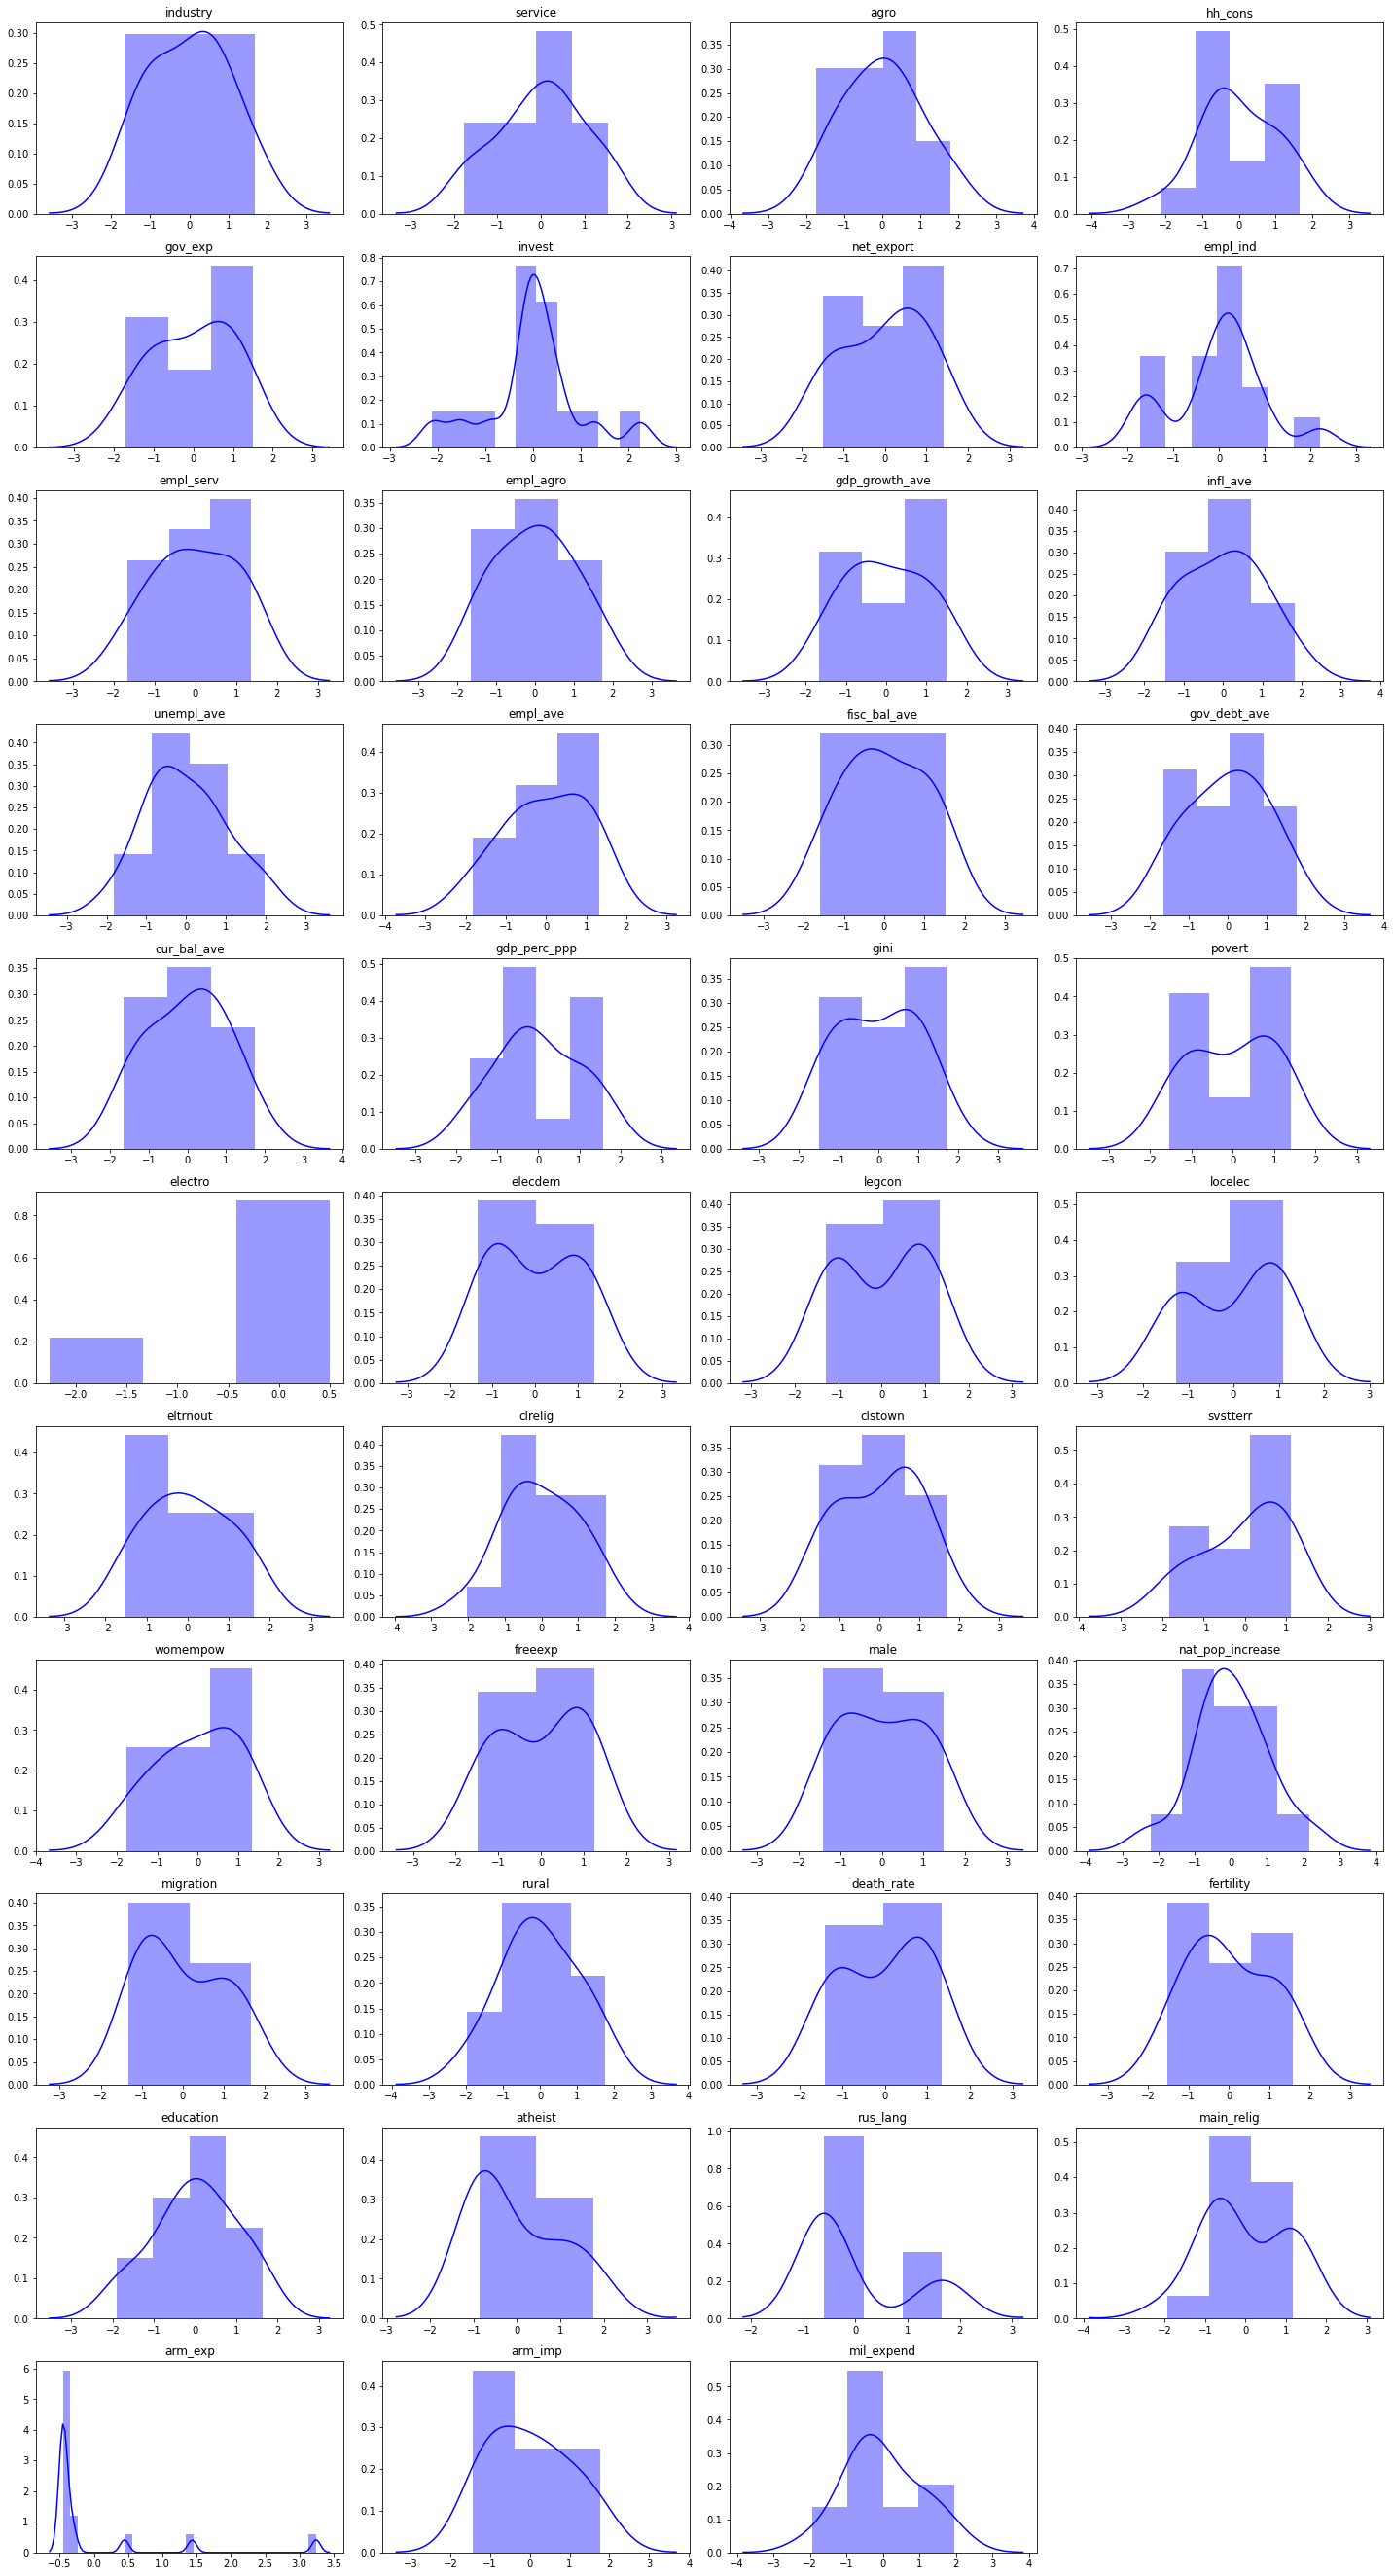

In [76]:
#Create a density plot for each attribute for visual inspection after scaling
plt.figure(figsize = (20, 50))
for k in range(len(columns_post_attr)):
  plt.subplot(15, 4, k+1)
  sns.distplot(post_df_attr_norm_clean_sc[[columns_post_attr[k]]], color = 'b');
  plt.title(columns_post_attr[k])
plt.tight_layout()

Visual analysis allows us to eliminate two more variables: "arm_exp" and "electro" - there is not normal distribution. This could lead to bias results.

In [77]:
elimin_post = ['arm_exp', 'electro', 'country_id', 'country_name', 'post_ussr', 'birth_rate', 'med_age', 'life_expect', 'mediacens', 'cspart', 'jucon', 'frefair', 'delibdem', 'parpipdem']
#Drop highly correlated variable from dataset
post_df_attr_norm_clean = post_df_attr_norm.drop(['arm_exp', 'electro', 'birth_rate', 'med_age', 'life_expect', 'mediacens', 'cspart', 'jucon', 'frefair', 'delibdem', 'parpipdem'], axis=1)


#Remove from the list attributes that are not needed for analysis
columns_post_attr = [ elem for elem in columns_post if elem not in elimin_post]
len(columns_post_attr)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



41

In [78]:
#Scale the data with powertransformation 
ptransform = PowerTransformer(method='yeo-johnson')
post_df_attr_norm_clean_sc = ptransform.fit_transform(post_df_attr_norm_clean)

In [79]:
#Back to DataFrame with attribution titles
post_df_attr_norm_clean_sc_add = pd.DataFrame(data = post_df_attr_norm_clean_sc, columns = [columns_post_attr]) 

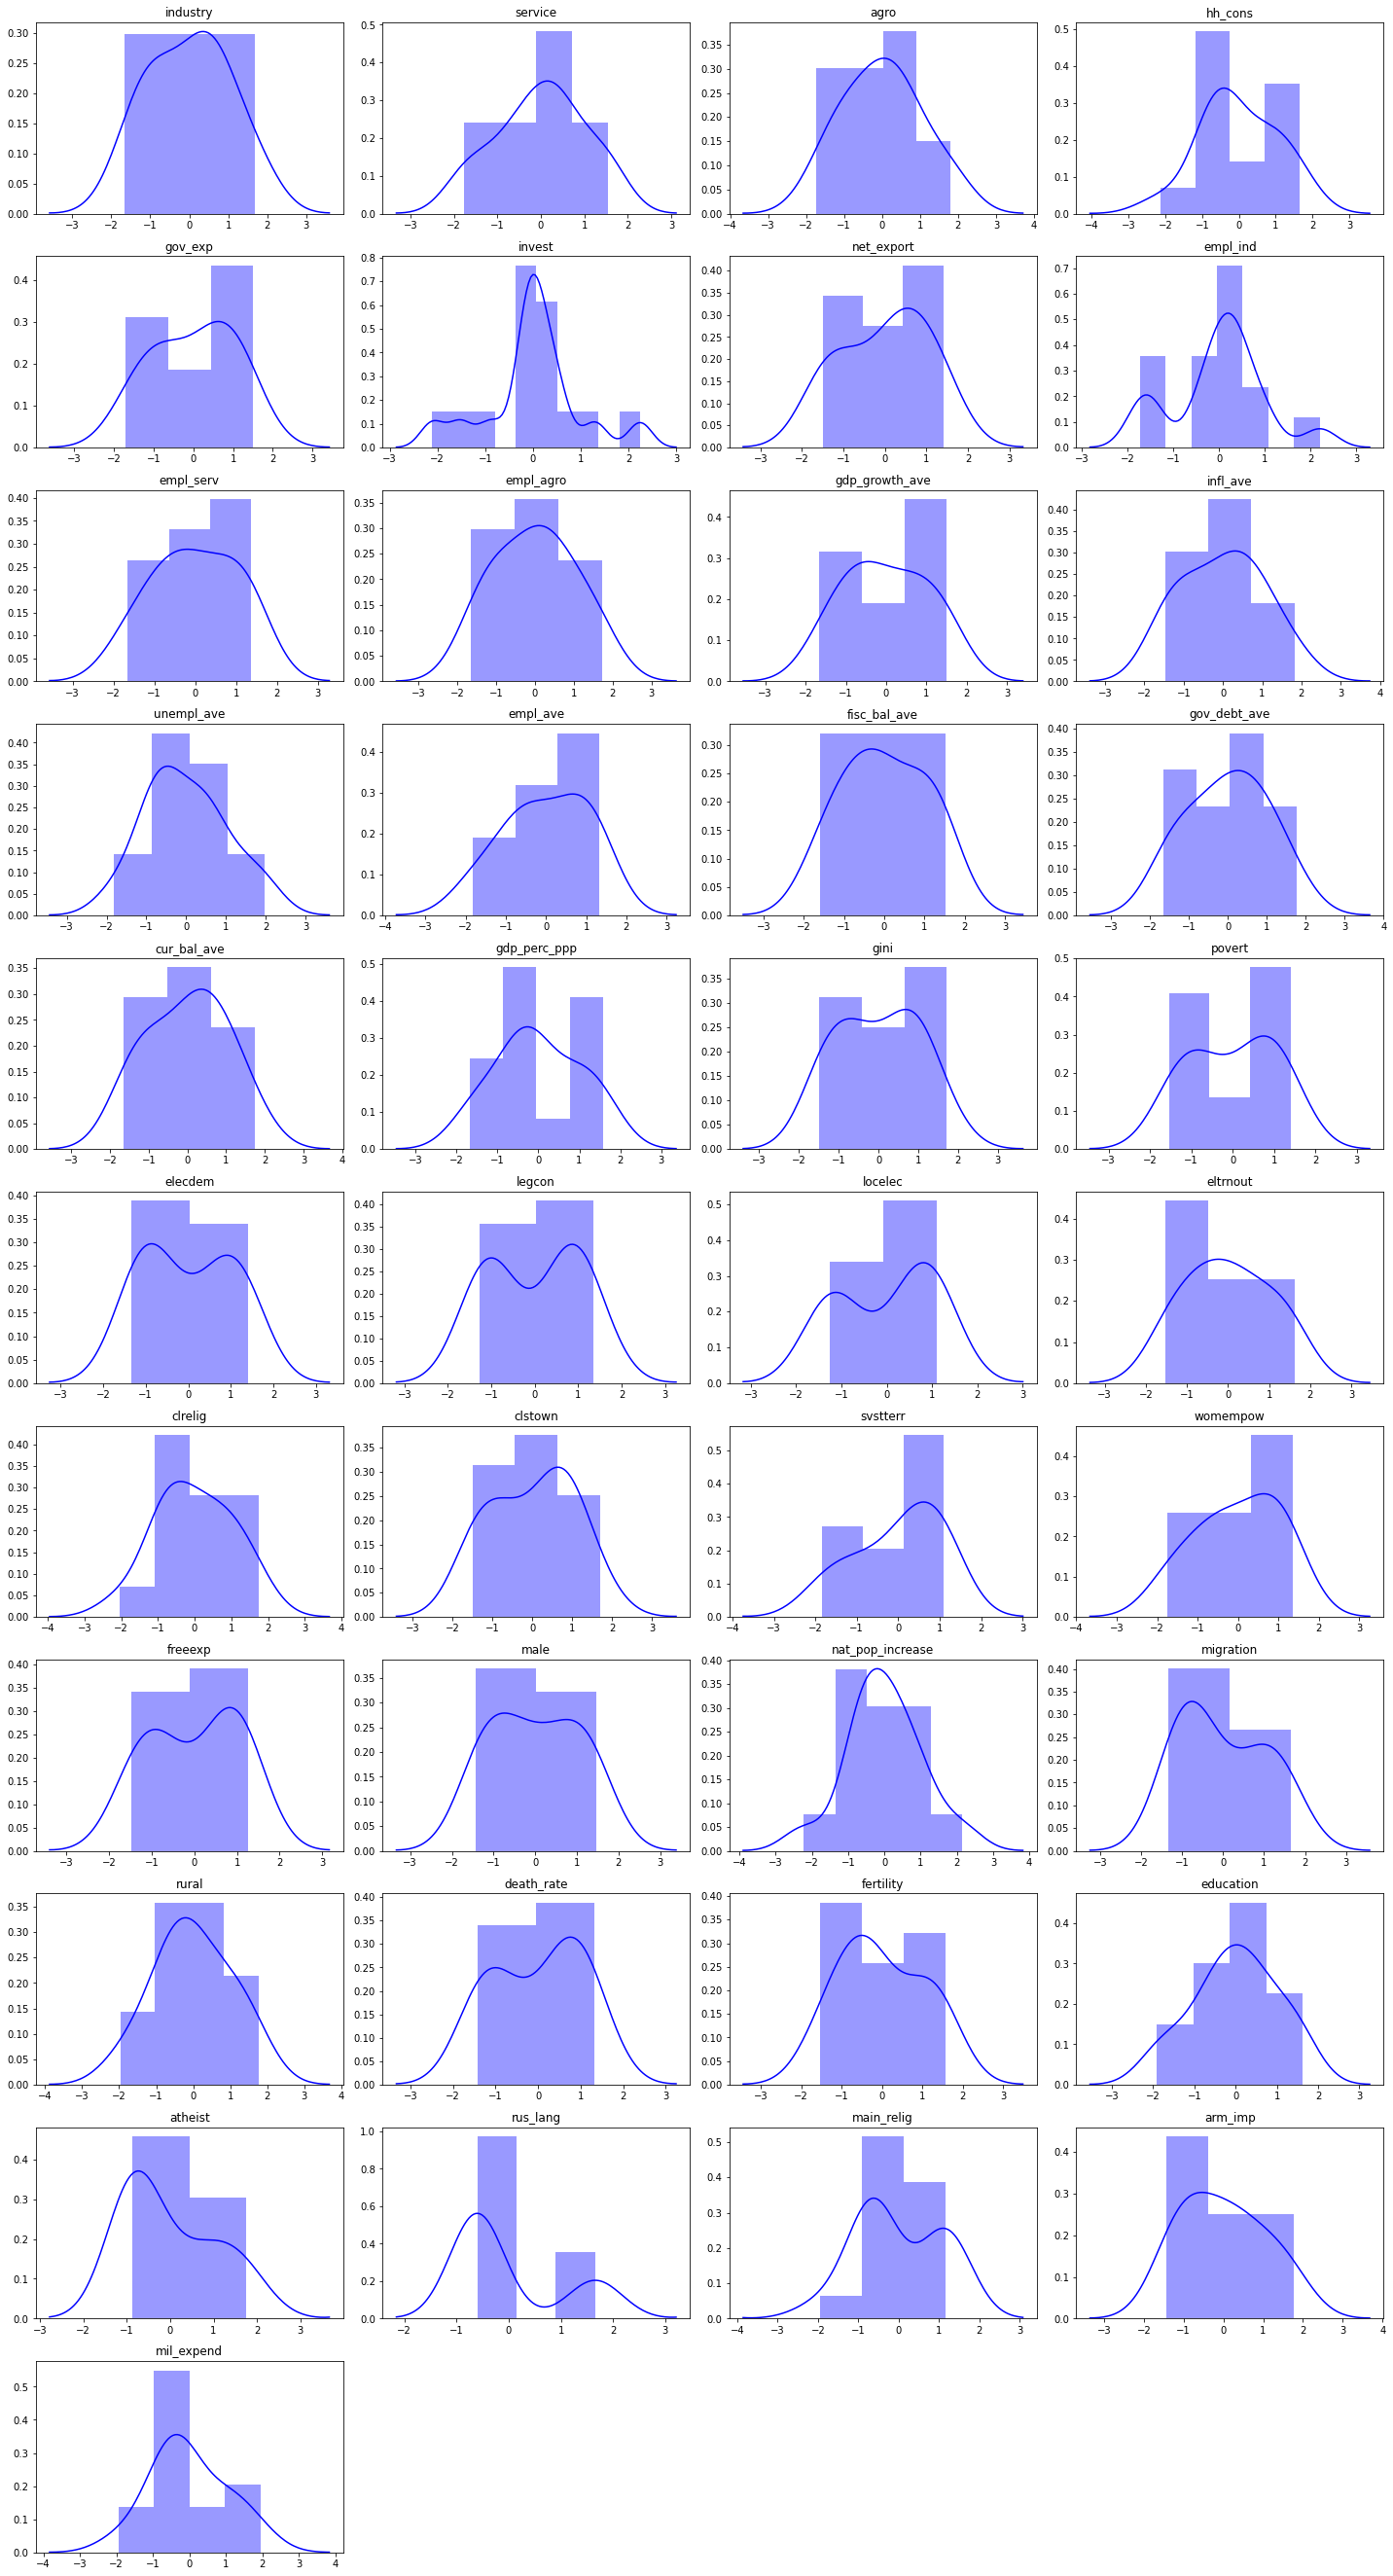

In [80]:
#Create a density plot for each attribute for visual inspection after scaling
plt.figure(figsize = (20, 50))
for k in range(len(columns_post_attr)):
  plt.subplot(15, 4, k+1)
  sns.distplot(post_df_attr_norm_clean_sc_add[[columns_post_attr[k]]], color = 'b');
  plt.title(columns_post_attr[k])
plt.tight_layout()

In [81]:
post_df_attr_norm_clean_sc_add

industry   service      agro   hh_cons   gov_exp    invest net_export  \
0  -0.210300  0.008692  0.664157  1.551378 -0.709963 -0.892379  -0.475474   
1   1.619373 -1.118946 -0.187083 -0.374988 -1.031471 -0.084084   0.246404   
2   0.511300 -0.481952 -0.209145 -0.583079  0.510382  0.134342   0.638906   
3  -1.052163  1.532751 -1.743719 -0.853683  1.509660  0.604175   0.335986   
4  -1.103804  0.715186 -0.088594  0.501895 -0.548486  0.121269  -1.245168   
5   0.743709  0.324767 -0.587691 -0.677731 -1.458489  0.281182   1.166284   
6   0.257340 -0.421566  0.890529  0.951429  0.372887  0.429068  -1.365635   
7  -1.665238  1.554362 -1.054556 -0.254122  1.205859 -0.271745   0.438360   
8  -0.477158  1.162651 -1.221236 -0.187404  0.495739 -1.515033   1.350105   
9  -0.770462  0.126881  0.324666  1.643485 -0.272674 -0.093519  -1.504282   
10  0.332366  0.393750 -1.079543 -0.738732  1.000535 -0.116884   0.833105   
11  0.708163 -1.659621  1.686409  0.941825 -1.024367 -0.031239  -1.421371   
12  1.676636 -0.680456  0.530767 -2.139965 -1.712806  2.240327   1.409014   
13 -1.271675  0.309684  0.282396  0.791878  1.134888 -2.105624   0.219080   
14  0.701913 -1.766182  1.792641 -0.572185  0.528306  1.300144  -0.625313   

    empl_ind empl_serv empl_agro  ... migration     rural death_rate  \
0   0.193304 -0.607928  0.541785  ...  0.094355 -0.494536  -0.079026   
1  -1.623276 -0.799835  1.293913  ... -1.333629 -0.155806  -1.177308   
2   1.021907  0.156323 -0.629003  ...  1.030403 -1.319386   0.763144   
3   0.786138  1.264178 -1.647050  ...  1.405726 -0.790665   0.415613   
4  -1.737203 -0.953318  1.407087  ... -0.613450 -0.458364   0.760505   
5  -0.431842  0.789433 -0.234640  ...  1.662192 -1.963146  -0.780610   
6   0.288688 -0.188782  0.169359  ... -0.956817  0.756536  -1.273907   
7   0.028783  1.369788 -1.076793  ...  1.237836  0.788980   1.270210   
8   0.341213  1.231224 -1.186871  ... -0.417525  1.760029   1.029490   
9  -0.303957  0.022071  0.304401  ... -0.923089  1.388206   0.442515   
10  0.506627  1.172876 -1.268160  ...  0.513036 -0.049491   0.910523   
11 -1.414065 -1.653312  1.720742  ... -1.053065  1.185357  -1.376959   
12  2.202989 -1.653312  0.281813  ... -0.857107  0.030996  -0.818875   
13  0.226309  0.451629 -0.337541  ...  0.951823 -0.809849   1.330962   
14 -0.085616 -0.601035  0.660958  ... -0.740690  0.131140  -1.416275   

   fertility education   atheist  rus_lang main_relig   arm_imp mil_expend  
0  -0.218990 -0.063350 -0.780488 -0.603023  -0.628456  0.489407   1.452057  
1  -0.141679 -0.417404 -0.867281 -0.603023   1.160882  1.533698   1.114640  
2  -1.070647  0.685588  1.423695  1.658312  -0.628456  1.256296   1.946095  
3  -0.411607  0.521283  1.755290 -0.603023  -1.937645 -0.434168  -0.097392  
4   0.270339  0.446896 -0.867281 -0.603023  -0.628456 -1.005372  -0.124999  
5   1.165486  1.366692 -0.274564  1.658312   1.160882  1.762463  -0.418799  
6   1.437401 -0.353425 -0.867281  1.658312   1.160882 -1.141862  -0.444901  
7  -0.517041  1.243474  1.667959 -0.603023  -0.628456 -0.716534  -0.228252  
8  -0.517041 -0.006810  0.466949 -0.603023  -0.628456  0.293802  -0.184074  
9  -1.398348  0.135901 -0.780488 -0.603023  -0.628456 -1.438888  -1.937345  
10 -0.758475 -0.937901  0.892911  1.658312  -0.628456  0.095497   0.969908  
11  1.579678 -0.737819 -0.738347 -0.603023   1.160882 -1.171576  -0.846331  
12  1.035313 -1.603415 -0.867281 -0.603023   1.160882  0.887067  -1.019262  
13 -1.527752 -1.913085  0.703485 -0.603023  -0.628456 -0.590825   0.584514  
14  1.073361  1.633375 -0.867281 -0.603023   1.160882  0.180995  -0.765861  

[15 rows x 41 columns]

With prepared data, now we can run K-Mean+ algorithm to clasterize post-USSR countries into separate groups.

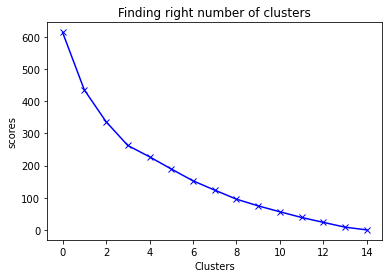

In [82]:
scores = []

range_values = range(1,16)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(post_df_attr_norm_clean_sc_add)
    scores.append(kmeans.inertia_)
    
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

Using the Elbow method I would choose 3 clasters. But we are going to check this selection with the silhouette analysis.

For n_clusters = 2 The average silhouette_score is : 0.19468866703860174
For n_clusters = 3 The average silhouette_score is : 0.1888219927948782
For n_clusters = 4 The average silhouette_score is : 0.2157787894233526
For n_clusters = 5 The average silhouette_score is : 0.198273563293614
For n_clusters = 6 The average silhouette_score is : 0.18623034394624882


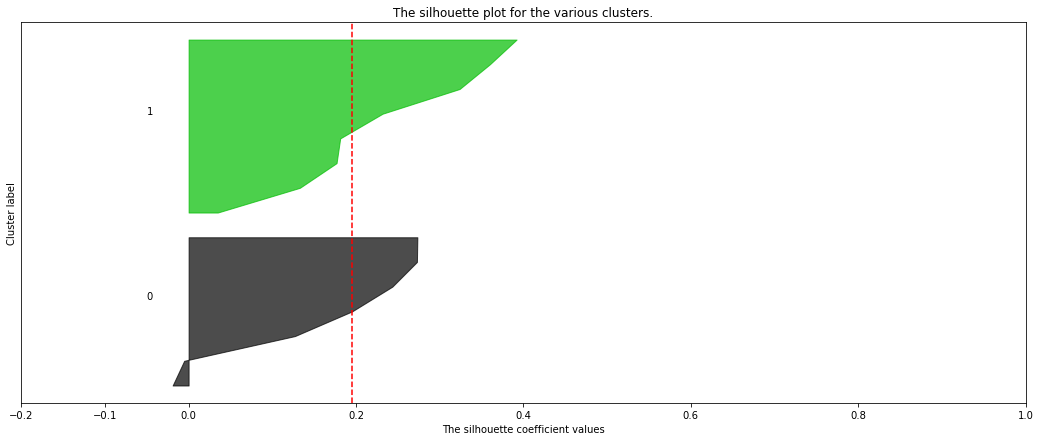

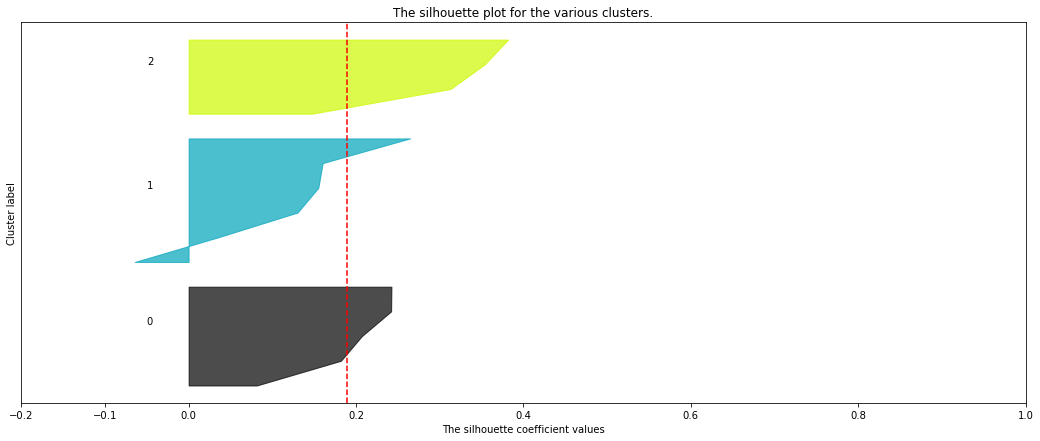

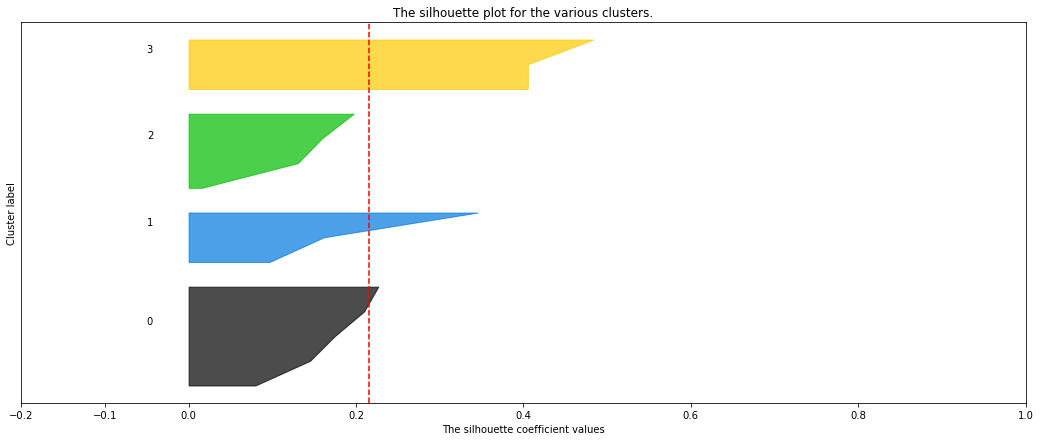

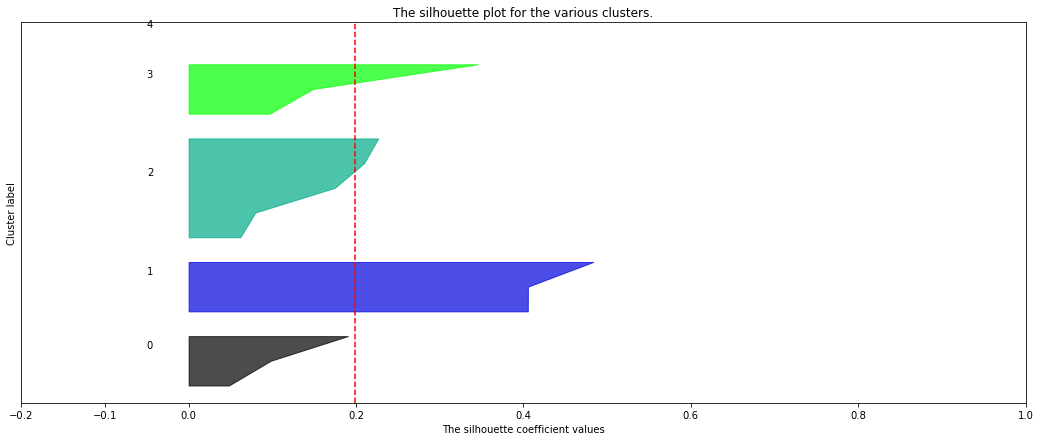

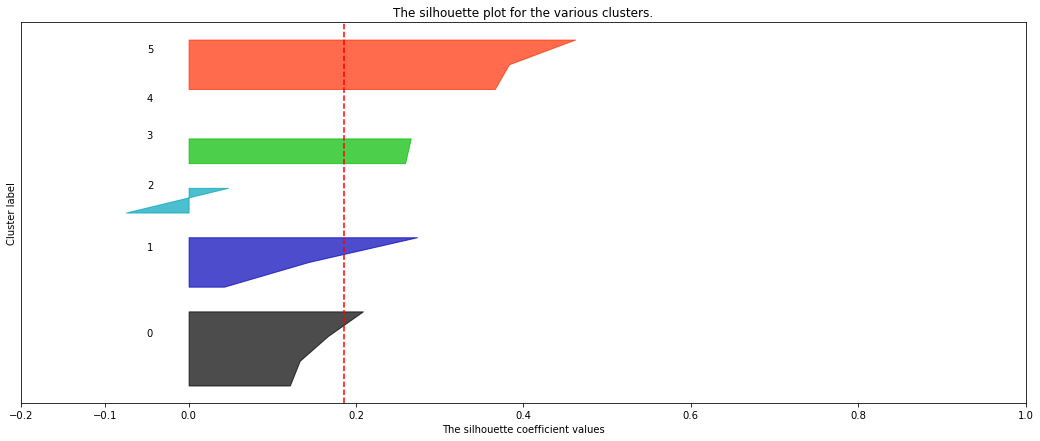

In [83]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(post_df_attr_norm_clean_sc_add)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(post_df_attr_norm_clean_sc_add, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(post_df_attr_norm_clean_sc_add, cluster_labels)

    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 0  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

Looks like 3 clusters is an optimal choice and we can proceed with that.

In [84]:
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans.fit(post_df_attr_norm_clean_sc_add)

KMeans(n_clusters=3, random_state=15)

In [85]:
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(3, 41)

In [86]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_post_attr)
cluster_centers 

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
0  0.993516 -0.897065  0.504316 -0.567687 -0.698074  0.640112    0.235654   
1 -0.715548  1.160878 -1.274763 -0.508485  1.052948 -0.324872    0.739389   
2 -0.619780  0.147775  0.414631  1.088013 -0.004670 -0.508237   -0.874296   

   empl_ind  empl_serv  empl_agro  ...  migration     rural  death_rate  \
0 -0.054984  -0.626956   0.515630  ...  -0.215316 -0.348474   -0.801147   
1  0.415690   1.259516  -1.294718  ...   0.684768  0.427213    0.906459   
2 -0.266572  -0.255265   0.417018  ...  -0.289436  0.076399    0.236210   

   fertility  education   atheist  rus_lang  main_relig   arm_imp  mil_expend  
0   0.606919   0.154503 -0.365176  0.150756    0.862659  0.741491    0.001747  
1  -0.551041   0.205011  1.195777 -0.037689   -0.955753 -0.190351    0.115047  
2  -0.287470  -0.349413 -0.518410 -0.150756   -0.270588 -0.737508   -0.094135  

[3 rows x 41 columns]

In [87]:
cluster_centers = ptransform.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = columns_post_attr)
cluster_centers

industry   service      agro   hh_cons   gov_exp    invest  net_export  \
0  0.703115  0.376641  0.359731  0.564273  0.391632  0.592002    0.661370   
1  0.192036  0.919829  0.049792  0.579045  0.889748  0.368376    0.813416   
2  0.214324  0.685667  0.336198  0.907279  0.606787  0.327790    0.273903   

   empl_ind  empl_serv  empl_agro  ...  migration     rural  death_rate  \
0  0.349869   0.390386   0.494002  ...   0.149111  0.403468    0.248473   
1  0.466450   0.969554   0.059299  ...   0.363158  0.614127    0.860028   
2  0.300324   0.515291   0.462612  ...   0.136481  0.517550    0.630504   

   fertility  education   atheist  rus_lang  main_relig   arm_imp  mil_expend  
0   0.466279   0.744610  0.043215  0.085568    0.867402  0.347157    0.169417  
1   0.157380   0.754971  0.342788  0.060157    0.239948  0.146665    0.184840  
2   0.212248   0.631609  0.028865  0.046423    0.444287  0.072199    0.157122  

[3 rows x 41 columns]

In [88]:
y_kmeans = kmeans.fit_predict(post_df_attr_norm_clean_sc_add)
y_kmeans

array([2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0], dtype=int32)

In [89]:
post_df.reset_index(drop=True, inplace=True)

In [90]:
post_df_fin = pd.concat([post_df, pd.DataFrame({'cluster':labels})], axis = 1)
post_df_fin

country_id        country_name  post_ussr  industry   service      agro  \
0            9             Armenia          1  0.264138  0.532964  0.117173   
1           13          Azerbaijan          1  0.413879  0.425185  0.069258   
2           18             Belarus          1  0.313006  0.490749  0.068293   
3           63             Estonia          1  0.218782  0.638507  0.019365   
4           72             Georgia          1  0.216332  0.585681  0.073698   
5           98          Kazakhstan          1  0.331221  0.557537  0.053223   
6          105     Kyrgyz Republic          1  0.294568  0.496260  0.135068   
7          107              Latvia          1  0.191769  0.639811  0.037752   
8          113           Lithuania          1  0.248570  0.615487  0.032882   
9          127             Moldova          1  0.232778  0.542362  0.095113   
10         158  Russian Federation          1  0.299865  0.562675  0.037002   
11         186          Tajikistan          1  0.328347  0.352558  0.237879   
12         195        Turkmenistan          1  0.420201  0.471884  0.107915   
13         198             Ukraine          1  0.208599  0.556404  0.092684   
14         203          Uzbekistan          1  0.327845  0.334992  0.260686   

     hh_cons   gov_exp    invest  net_export  ...  birth_rate  fertility  \
0   0.834396  0.124721  0.172246   -0.086420  ...      13.646      1.758   
1   0.575067  0.111235  0.242835   -0.007723  ...      14.100      1.800   
2   0.539637  0.168430  0.262717    0.031187  ...       9.300      1.382   
3   0.490091  0.198566  0.306645    0.001365  ...      10.600      1.660   
4   0.705521  0.131113  0.261518   -0.185598  ...      13.200      2.055   
5   0.522789  0.091322  0.276276    0.080194  ...      21.730      2.900   
6   0.763609  0.163952  0.290088   -0.203280  ...      26.900      3.300   
7   0.594728  0.189803  0.226028    0.011596  ...       9.800      1.610   
8   0.605318  0.167957  0.121072    0.096521  ...       9.800      1.610   
9   0.844684  0.141536  0.241984   -0.224641  ...       9.930      1.269   
10  0.511664  0.183696  0.239879    0.049633  ...       9.800      1.504   
11  0.762418  0.111545  0.247614   -0.211728  ...      30.038      3.556   
12  0.150779  0.077971  0.472000    0.101679  ...      23.066      2.740   
13  0.743545  0.187710  0.075112   -0.010521  ...       8.100      1.228   
14  0.541545  0.169007  0.374631   -0.104230  ...      24.300      2.785   

    education  atheist  rus_lang  main_relig  arm_exp  arm_imp  mil_expend  \
0    0.964698    0.013         0         2.0        0      377    0.167195   
1    0.955191    0.009         0         6.0        0     1002    0.127006   
2    0.981667    0.286         1         2.0      463      748    0.307957   
3    0.978235    0.602         0         0.0        0      150    0.056619   
4    0.976633    0.009         0         2.0       13       57    0.055601   
5    0.994587    0.040         1         6.0        0     1352    0.045624   
6    0.957000    0.009         1         6.0       10       38    0.044805   
7    0.992386    0.453         0         2.0        0      101    0.051924   
8    0.966113    0.098         0         2.0       60      317    0.053473   
9    0.969573    0.013         0         2.0        0        0    0.009911   
10   0.938479    0.152         1         2.0    28061      264    0.114318   
11   0.945382    0.015         0         6.0        0       34    0.033363   
12   0.908000    0.009         0         6.0        0      533    0.029000   
13   0.885000    0.125         0         2.0     1201      122    0.088034   
14   0.999172    0.009         0         6.0       68      286    0.035500   

    cluster  
0         2  
1         0  
2         0  
3         1  
4         2  
5         0  
6         2  
7         1  
8         1  
9         2  
10        1  
11        0  
12        0  
13        2  
14        0  

[15 rows x 56 columns]

In [91]:
post_df_fin.to_excel("postcl3.xlsx")   

The analysis shows that post-Soviet states were assigned to three different clusters. It means that the post-Soviet area is not homogeneous anymore. 

Clusters can be named as follows:

1. Conservative -- States with authoritarian political regime and centralized economy:
    1. Azerbaijan
    2. Belarus
    3. Kazakhstan
    4. Tajikistan
    5. Turkmenistan
    6. Uzbekistan
2. Intermediate -- States in transition that works on establishing democratic institutions and market economy:
    1. Armenia
    2. Georgia
    3. Kyrgyz Rep
    4. Moldova
    5. Ukraine
3. Westernized -- EU-States (except *Russia which is on the edge between Conservative and Westernized groups due to its mostly pro-market economy, but with strong control of authorities on the political system):
    1. Estonia
    2. Latvia
    3. Lithuania
    4. Russia*

## 5. VIZUALIZATION

I use Violin charts to analyze three clusters of post-Soviet countries dissected by each attribute. It gives you a chance to go deeper into the difference between clusters if needed. Feel to play with the charts to find some new insides about the region.

In [93]:
post_df_fin.columns

Index(['country_id', 'country_name', 'post_ussr', 'industry', 'service',
       'agro', 'hh_cons', 'gov_exp', 'invest', 'net_export', 'empl_ind',
       'empl_serv', 'empl_agro', 'gdp_growth_ave', 'infl_ave', 'unempl_ave',
       'empl_ave', 'fisc_bal_ave', 'gov_debt_ave', 'cur_bal_ave',
       'gdp_perc_ppp', 'gini', 'povert', 'electro', 'elecdem', 'parpipdem',
       'delibdem', 'frefair', 'jucon', 'legcon', 'cspart', 'locelec',
       'eltrnout', 'clrelig', 'clstown', 'svstterr', 'mediacens', 'womempow',
       'freeexp', 'male', 'nat_pop_increase', 'migration', 'rural',
       'life_expect', 'med_age', 'death_rate', 'birth_rate', 'fertility',
       'education', 'atheist', 'rus_lang', 'main_relig', 'arm_exp', 'arm_imp',
       'mil_expend', 'cluster'],
      dtype='object')

In [94]:
#copy the data
viol_post = post_df_fin

viol_post['Clusters'] = viol_post['cluster']

#Change names of clusters
viol_post.loc[viol_post.cluster == 0, 'Clusters'] = 3
viol_post.loc[viol_post.cluster == 1, 'Clusters'] = 1
viol_post.loc[viol_post.cluster == 2, 'Clusters'] = 2  
viol_post


country_id        country_name  post_ussr  industry   service      agro  \
0            9             Armenia          1  0.264138  0.532964  0.117173   
1           13          Azerbaijan          1  0.413879  0.425185  0.069258   
2           18             Belarus          1  0.313006  0.490749  0.068293   
3           63             Estonia          1  0.218782  0.638507  0.019365   
4           72             Georgia          1  0.216332  0.585681  0.073698   
5           98          Kazakhstan          1  0.331221  0.557537  0.053223   
6          105     Kyrgyz Republic          1  0.294568  0.496260  0.135068   
7          107              Latvia          1  0.191769  0.639811  0.037752   
8          113           Lithuania          1  0.248570  0.615487  0.032882   
9          127             Moldova          1  0.232778  0.542362  0.095113   
10         158  Russian Federation          1  0.299865  0.562675  0.037002   
11         186          Tajikistan          1  0.328347  0.352558  0.237879   
12         195        Turkmenistan          1  0.420201  0.471884  0.107915   
13         198             Ukraine          1  0.208599  0.556404  0.092684   
14         203          Uzbekistan          1  0.327845  0.334992  0.260686   

     hh_cons   gov_exp    invest  net_export  ...  fertility  education  \
0   0.834396  0.124721  0.172246   -0.086420  ...      1.758   0.964698   
1   0.575067  0.111235  0.242835   -0.007723  ...      1.800   0.955191   
2   0.539637  0.168430  0.262717    0.031187  ...      1.382   0.981667   
3   0.490091  0.198566  0.306645    0.001365  ...      1.660   0.978235   
4   0.705521  0.131113  0.261518   -0.185598  ...      2.055   0.976633   
5   0.522789  0.091322  0.276276    0.080194  ...      2.900   0.994587   
6   0.763609  0.163952  0.290088   -0.203280  ...      3.300   0.957000   
7   0.594728  0.189803  0.226028    0.011596  ...      1.610   0.992386   
8   0.605318  0.167957  0.121072    0.096521  ...      1.610   0.966113   
9   0.844684  0.141536  0.241984   -0.224641  ...      1.269   0.969573   
10  0.511664  0.183696  0.239879    0.049633  ...      1.504   0.938479   
11  0.762418  0.111545  0.247614   -0.211728  ...      3.556   0.945382   
12  0.150779  0.077971  0.472000    0.101679  ...      2.740   0.908000   
13  0.743545  0.187710  0.075112   -0.010521  ...      1.228   0.885000   
14  0.541545  0.169007  0.374631   -0.104230  ...      2.785   0.999172   

    atheist  rus_lang  main_relig  arm_exp  arm_imp  mil_expend  cluster  \
0     0.013         0         2.0        0      377    0.167195        2   
1     0.009         0         6.0        0     1002    0.127006        0   
2     0.286         1         2.0      463      748    0.307957        0   
3     0.602         0         0.0        0      150    0.056619        1   
4     0.009         0         2.0       13       57    0.055601        2   
5     0.040         1         6.0        0     1352    0.045624        0   
6     0.009         1         6.0       10       38    0.044805        2   
7     0.453         0         2.0        0      101    0.051924        1   
8     0.098         0         2.0       60      317    0.053473        1   
9     0.013         0         2.0        0        0    0.009911        2   
10    0.152         1         2.0    28061      264    0.114318        1   
11    0.015         0         6.0        0       34    0.033363        0   
12    0.009         0         6.0        0      533    0.029000        0   
13    0.125         0         2.0     1201      122    0.088034        2   
14    0.009         0         6.0       68      286    0.035500        0   

    Clusters  
0          2  
1          3  
2          3  
3          1  
4          2  
5          3  
6          2  
7          1  
8          1  
9          2  
10         1  
11         3  
12         3  
13         2  
14         3  

[15 rows x 57 columns]

<ipython-input-95-78918fd080c4>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



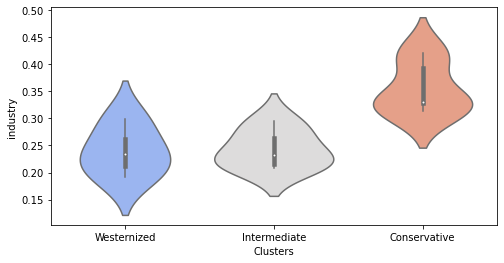

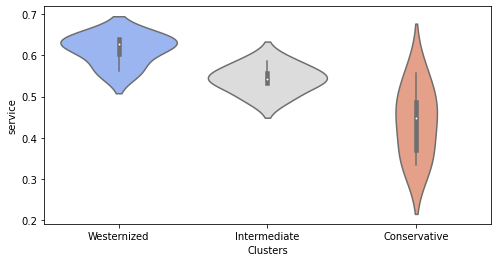

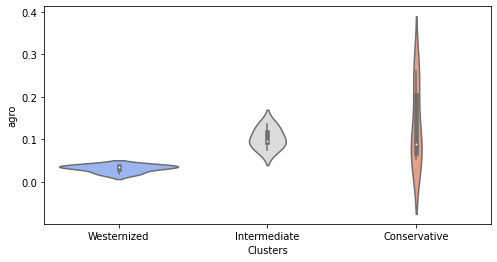

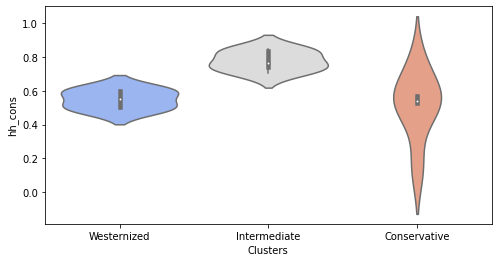

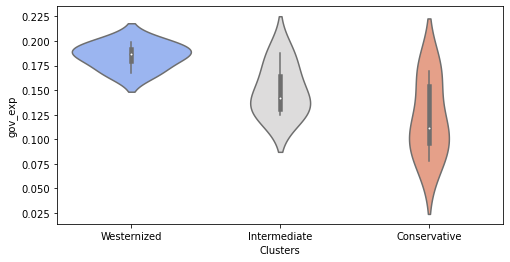

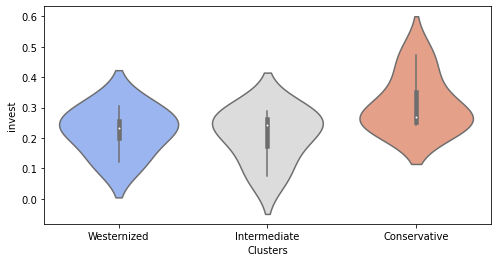

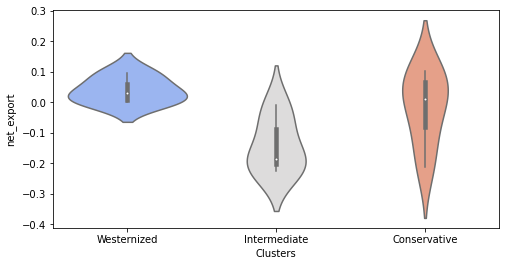

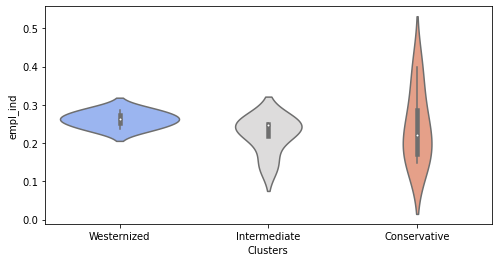

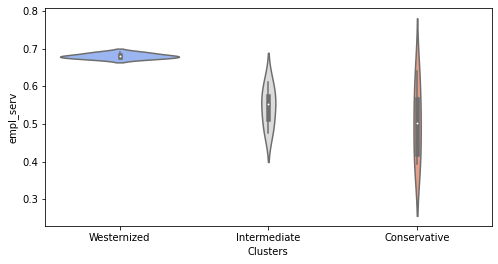

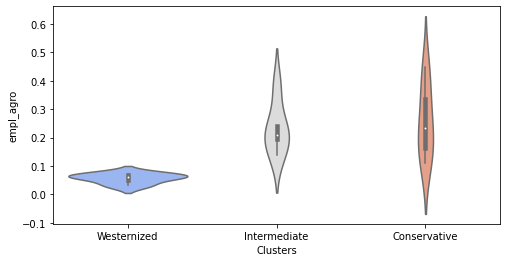

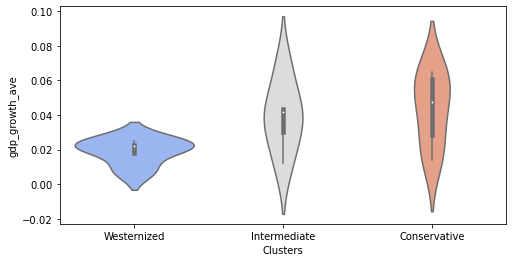

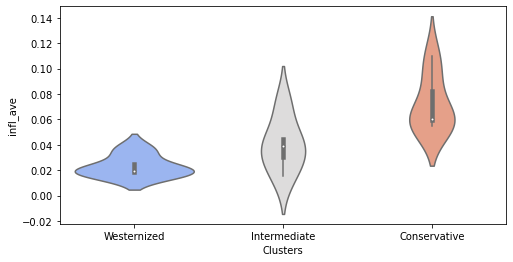

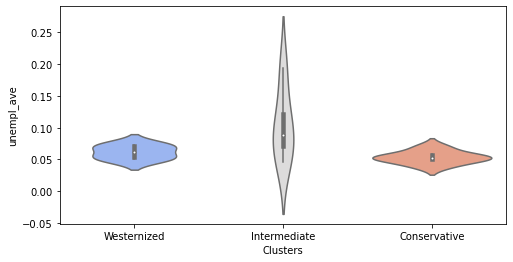

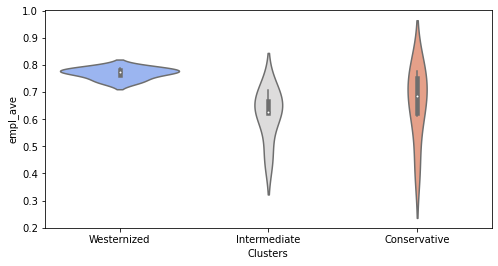

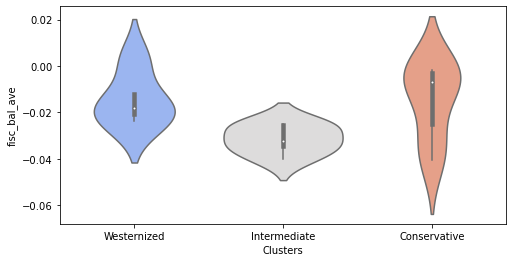

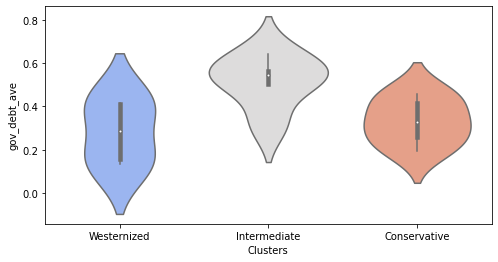

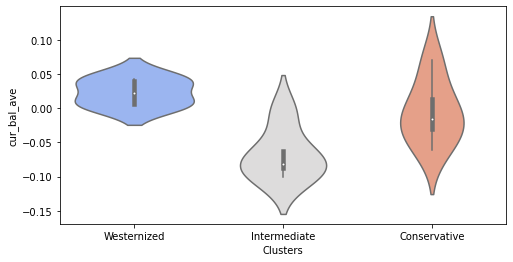

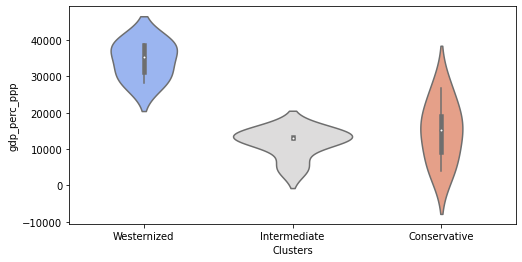

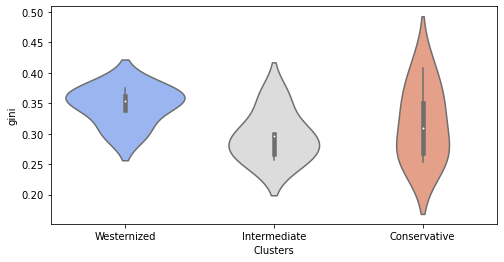

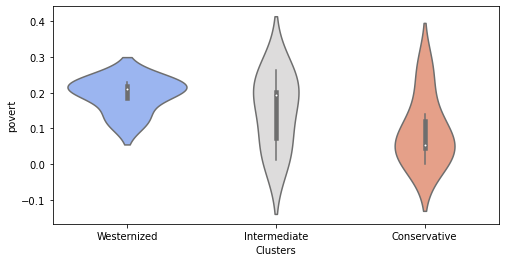

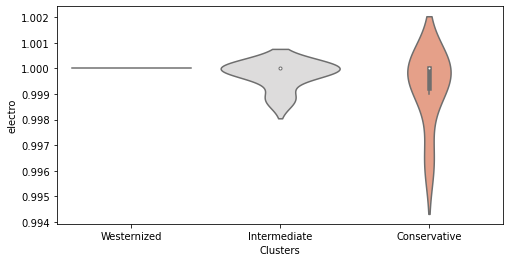

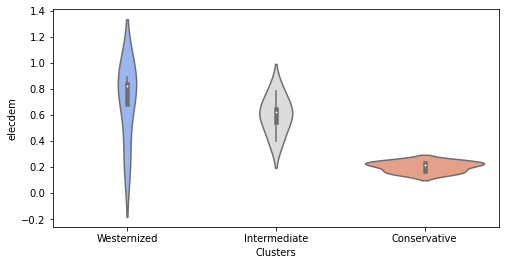

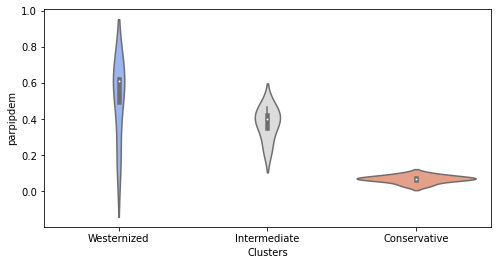

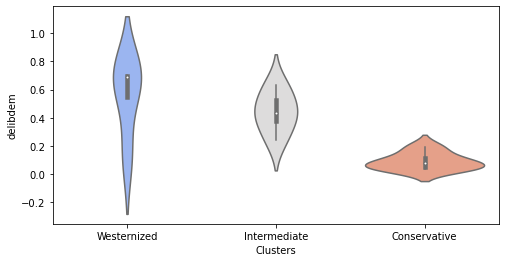

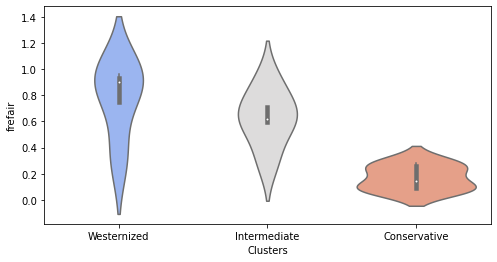

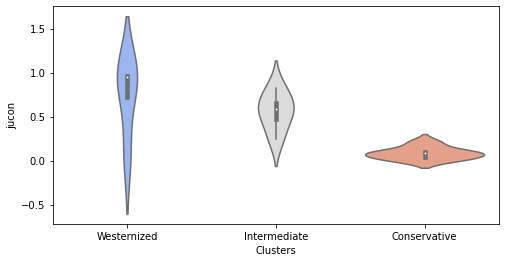

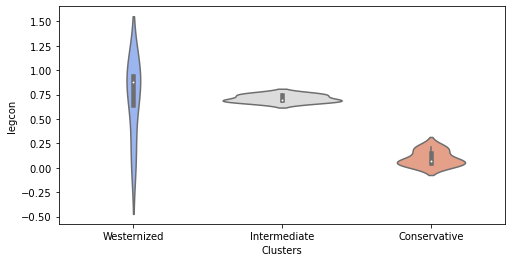

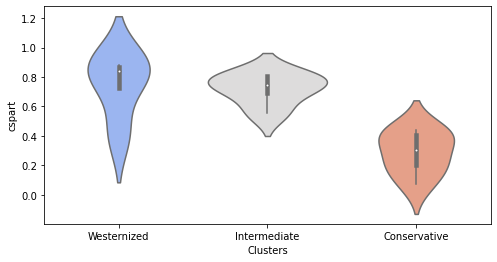

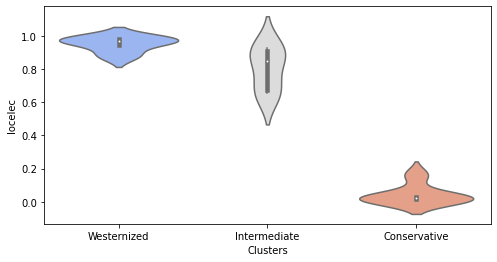

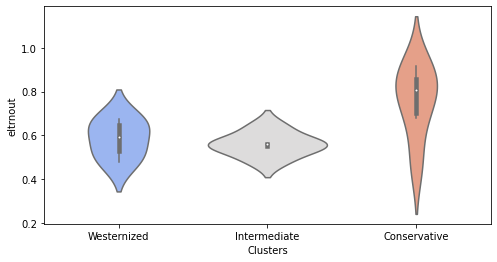

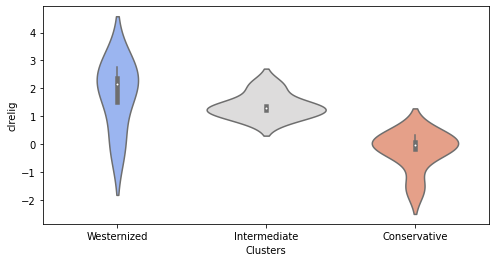

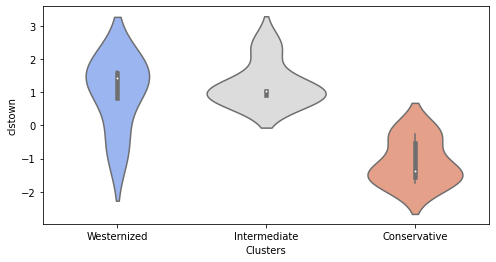

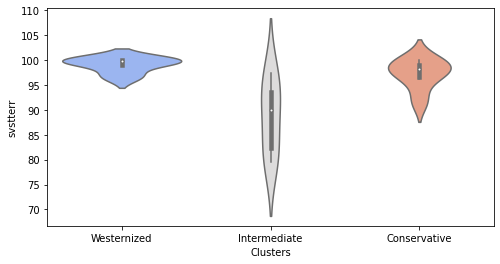

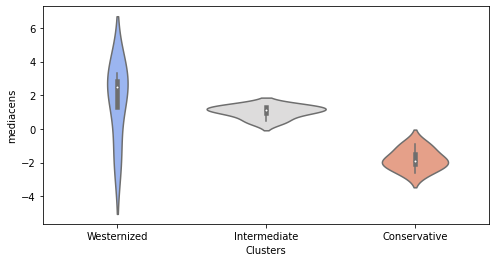

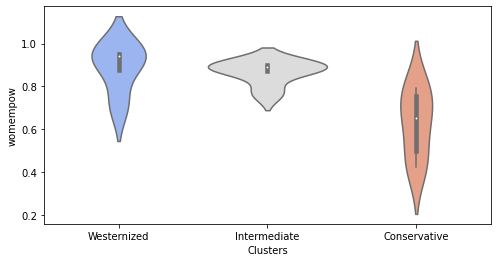

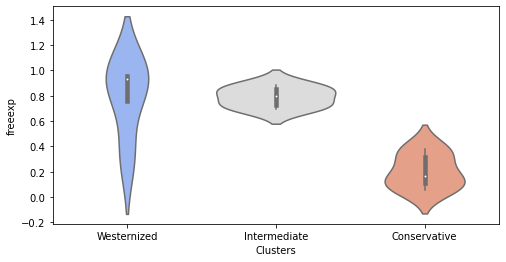

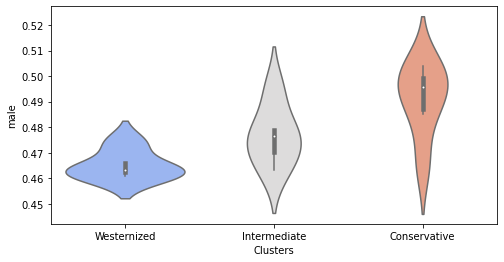

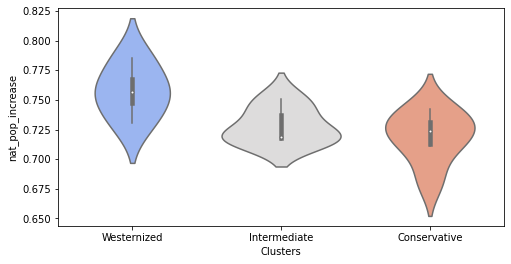

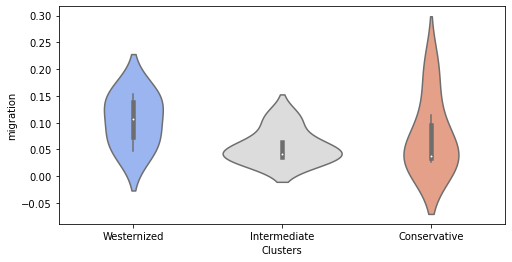

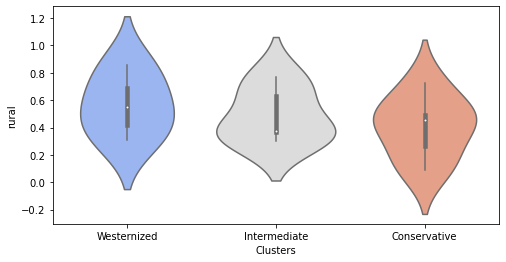

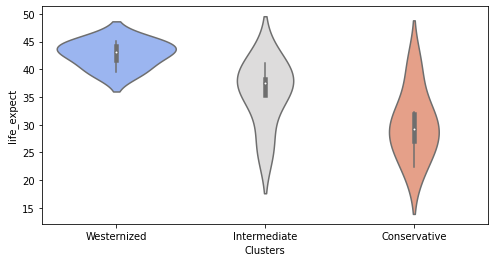

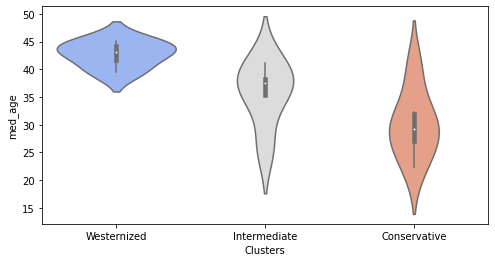

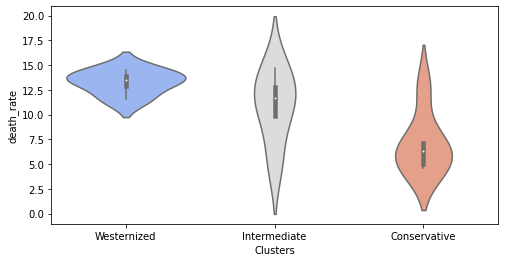

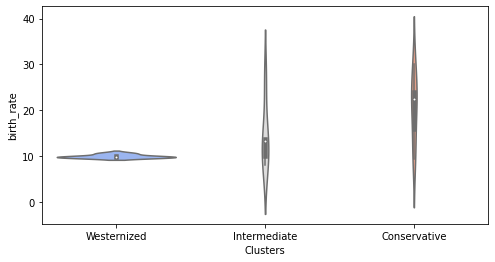

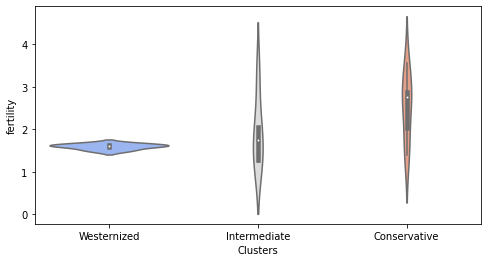

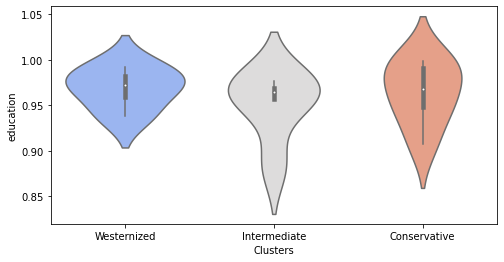

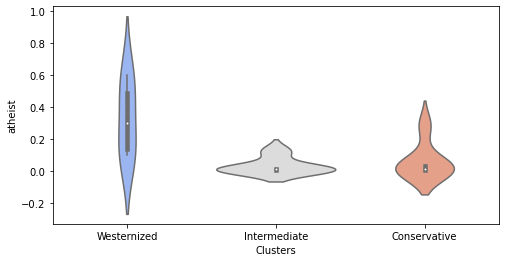

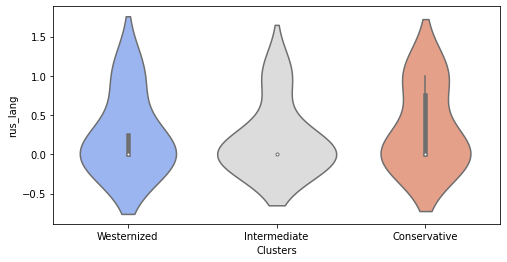

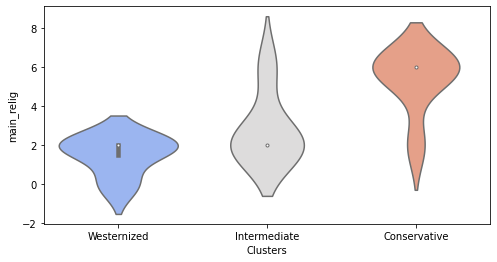

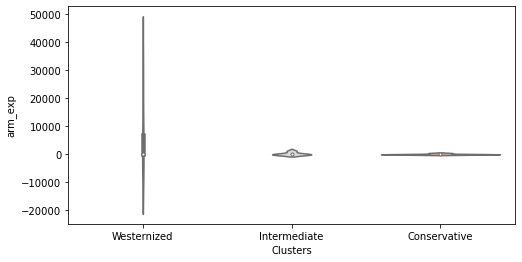

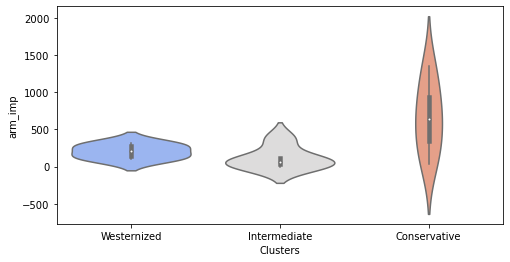

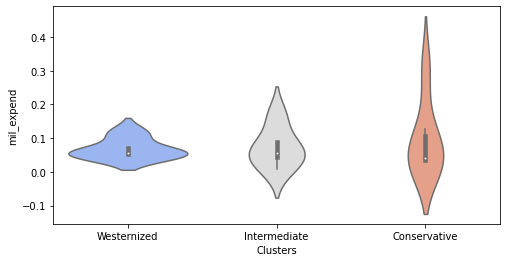

In [95]:
labels_post_viol = ['Westernized', 'Intermediate', 'Conservative']
for i in columns_attr:
    fig, ax = plt.subplots(1,1, figsize=(8, 4))
    sns.violinplot('Clusters', i ,data=post_df_fin,palette='coolwarm')
    ax.set_xticklabels(labels_post_viol)
plt.show()